# Bohmian Equations: Resonant cases

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from pylds.base import compute_lagrangian_descriptor
from pylds.tools import draw_ld, draw_all_lds, normalise, get_gradient_magnitude, draw_ld_pair

This expressions matches the one in the Overleaf project of the students

In [2]:
def Bohmian_velocity_field(time, u, PARAMETERS=[1,1,1,0]):
    x, y = u.T
    #model parameters
    a, b, omega2, t0 = PARAMETERS
    t = time + t0
    #velocity components
    G = 1 + 2*a*x*np.cos(t) +\
        2*b*np.sqrt(omega2)*x*y*np.cos((1 + omega2)*t) +\
        (a*x)**2 +\
        2*a*b*np.sqrt(omega2)*x**2*y*np.cos(omega2*t) +\
        omega2*(b*x*y)**2
    vx = -(a*np.sin(t) + b*np.sqrt(omega2)*y*np.sin((1 + omega2)*t))/G
    vy = -b*np.sqrt(omega2)*x*(a*x*np.sin(omega2*t) + np.sin((1 + omega2)*t))/G
    
    return np.column_stack([vx, vy])

In [3]:
def Bohmian_nodal_point(t, PARAMETERS=[1,1,1]):
    #model parameters
    a, b, omega2 = PARAMETERS
    #nodal components
    x_nodal = -np.sin((1 + omega2)*t)/(a*np.sin(omega2*t))
    y_nodal = -a*np.sin(t)/(b*np.sqrt(omega2)*np.sin((1 + omega2)*t))
    
    return np.column_stack([x_nodal, y_nodal])

# Case: $a, b, \omega_2 = (0, 1, N)$

## Description

* Wave function

\begin{equation*}
    \Psi = \psi_{0,0} + \frac{1}{2}\psi_{1,1}
\end{equation*}

* Bohm equations of motion

\begin{aligned}
    \frac{dx}{dt}=-\frac{ \sin(2t)y}{1+2 xy \cos(2t)+ x^2y^2} \\
    \frac{dy}{dt}=-\frac{ \sin(2t)x}{1+2 xy \cos(2t)+ x^2y^2} 
\end{aligned}

* Nodal lines (where $\Psi(x_N, y_N, t_N) = 0$)

\begin{equation*}
(x_N, y_N, t_N) = ( (-1)^{k+1}/y, y, k \pi/2) \quad y \in \mathbb{R}; k \in \mathbb{Z}
\end{equation*}

## Vector field 

In [18]:
N = 2
a, b, omega2, t0 = [0, 1, N, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, 0])

## Nodal lines and invariant sets

### Figure: ALL nodal lines and invariant sets

<IPython.core.display.Javascript object>


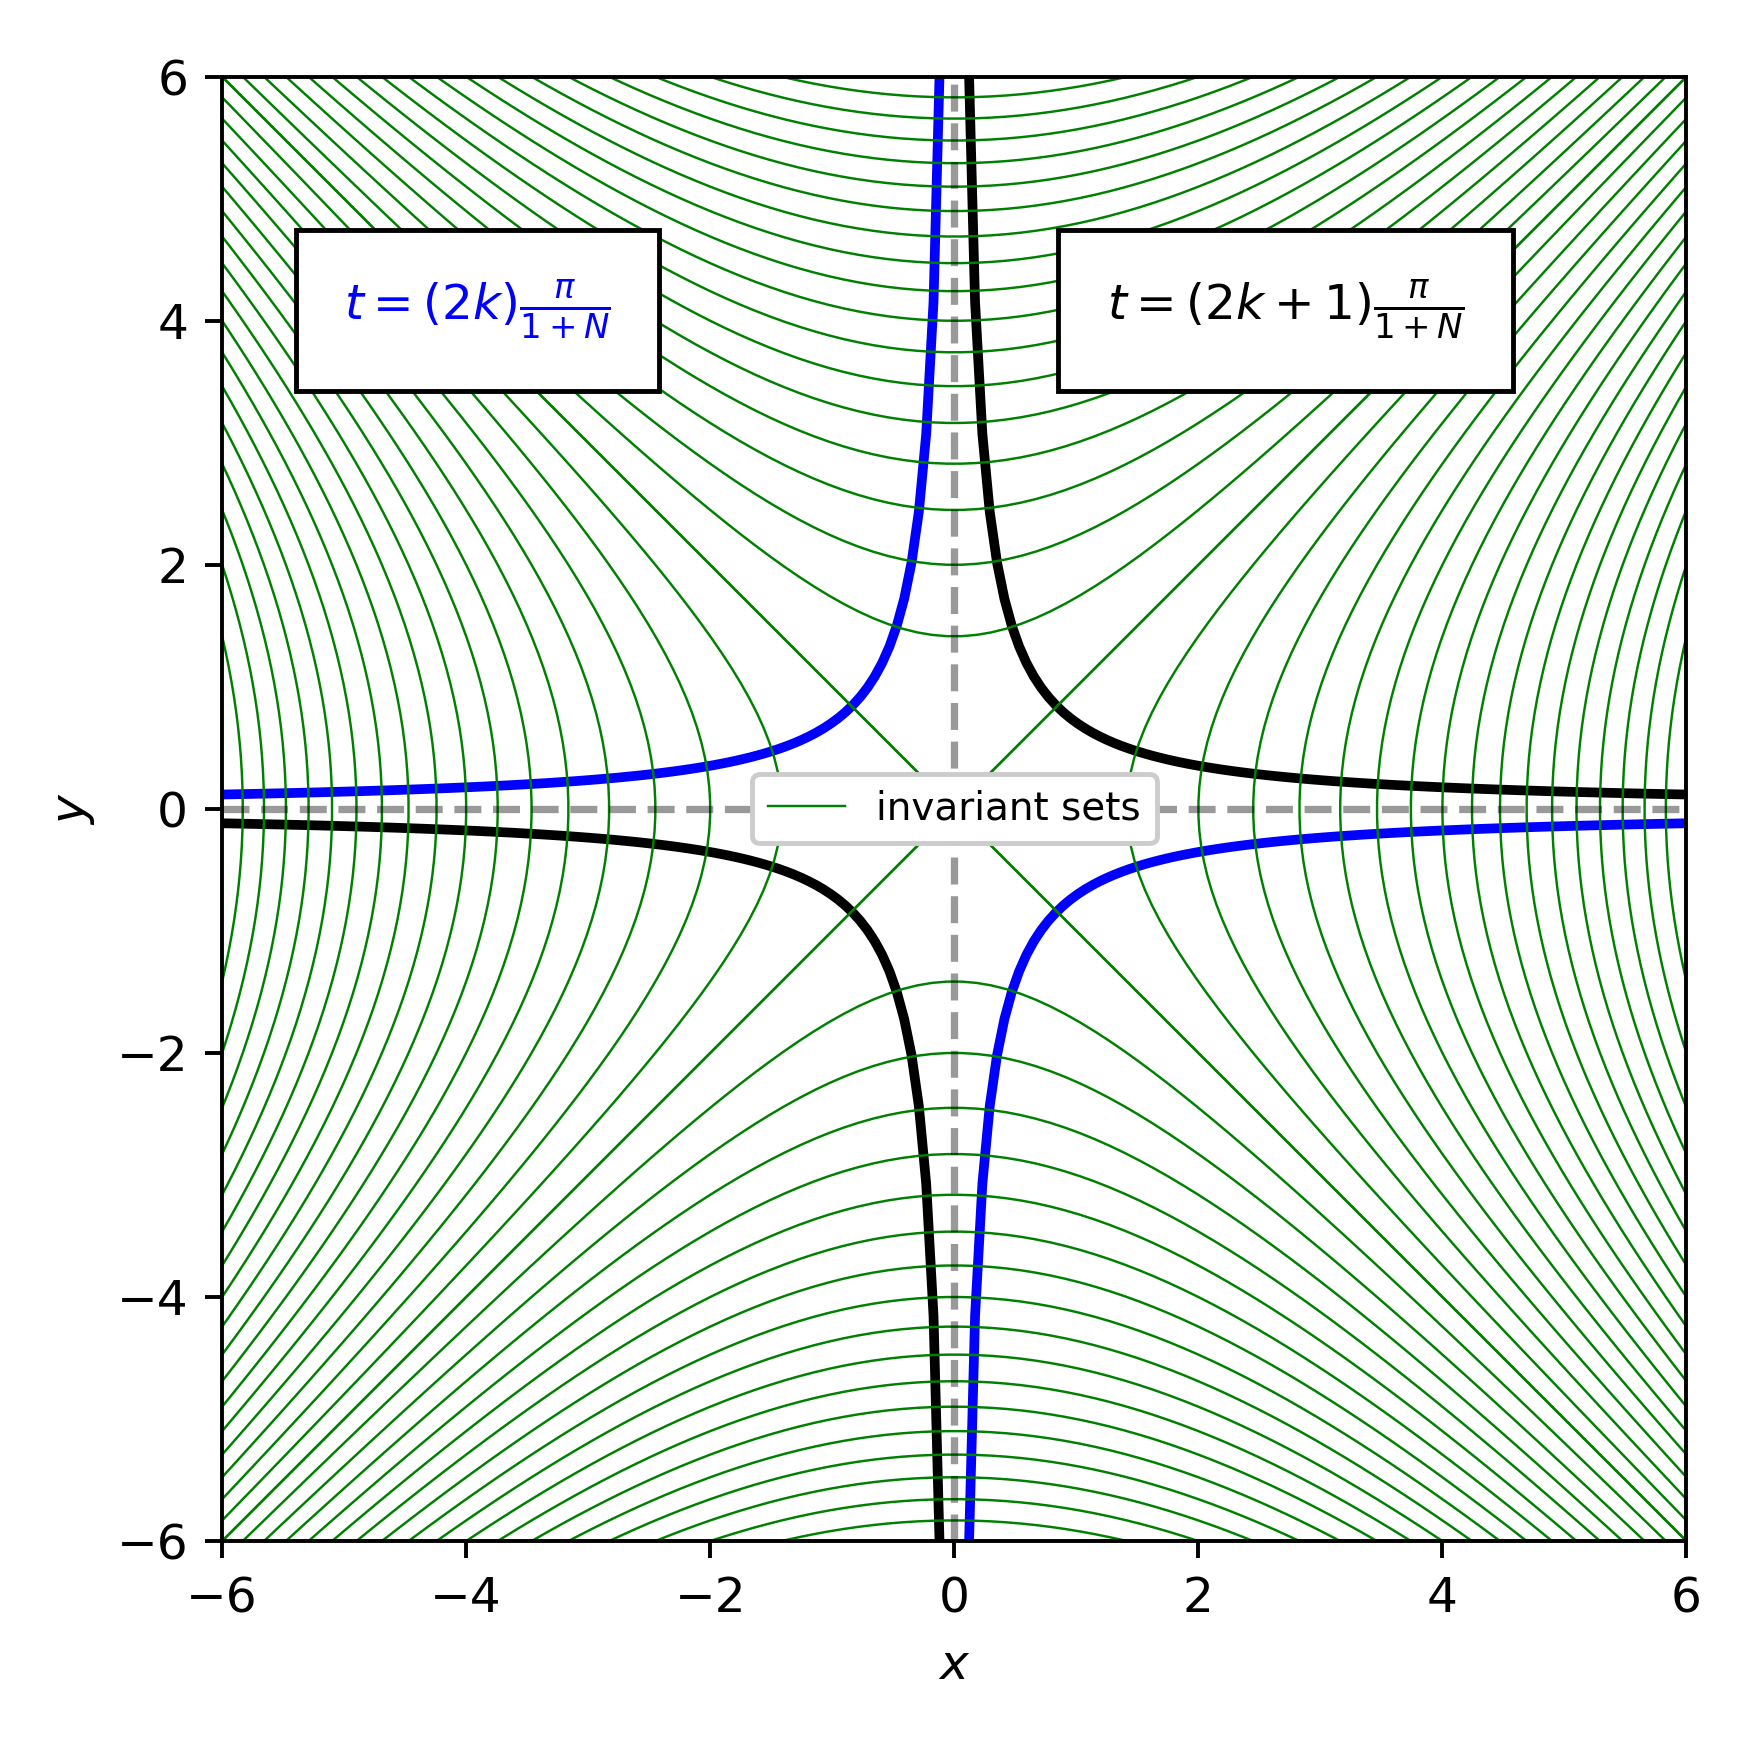

In [21]:
x_left = np.linspace(-6, -0.05, 100)
x_right = np.linspace(0.05, 6, 100)

fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)
##################################################
for x in [x_left, x_right]:
    ax.plot(x, -1/(x*np.sqrt(N)),color="blue",lw=2)
    ax.plot(x,  1/(x*np.sqrt(N)),color="black",lw=2)

ax.text(1.25,4,"$t = (2k + 1) \\frac{\pi}{1+N}$",color="black",fontsize=10,zorder=20,
        bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})

ax.text(-5,4,"$t = (2k) \\frac{\pi}{1+N}$", color="blue", fontsize=10,zorder=20,
       bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
##################################################
# invariant sets
x = np.linspace(-6,6,100)
lw = 0.5
#vertical parabolas
for Q in np.arange(0,40,2):
    ax.plot(x, np.sqrt(Q + x**2),color="green",lw=lw)
    ax.plot(x,-np.sqrt(Q + x**2),color="green",lw=lw)
#horizontal parabolas
for Q in np.arange(0,-40,-2):
    ax.plot( np.sqrt(-Q + x**2),x,color="green",lw=lw)
    ax.plot(-np.sqrt(-Q + x**2),x,color="green",lw=lw)
#label
ax.plot([],[],color="green",lw=lw,label="invariant sets")

# #selected invariant set
# Q = 0
# x = np.linspace(0,6,100)
# ax.plot(x, np.sqrt(Q + x**2),color="magenta",lw=2,alpha=1)

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",alpha=0.4)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.legend(loc="center",facecolor='white', framealpha=1,fontsize=8)
ax.set_aspect("equal")
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

fig.tight_layout()

plt.show()

### Figure: SELECTED invariant set: $Q = 0$

<IPython.core.display.Javascript object>


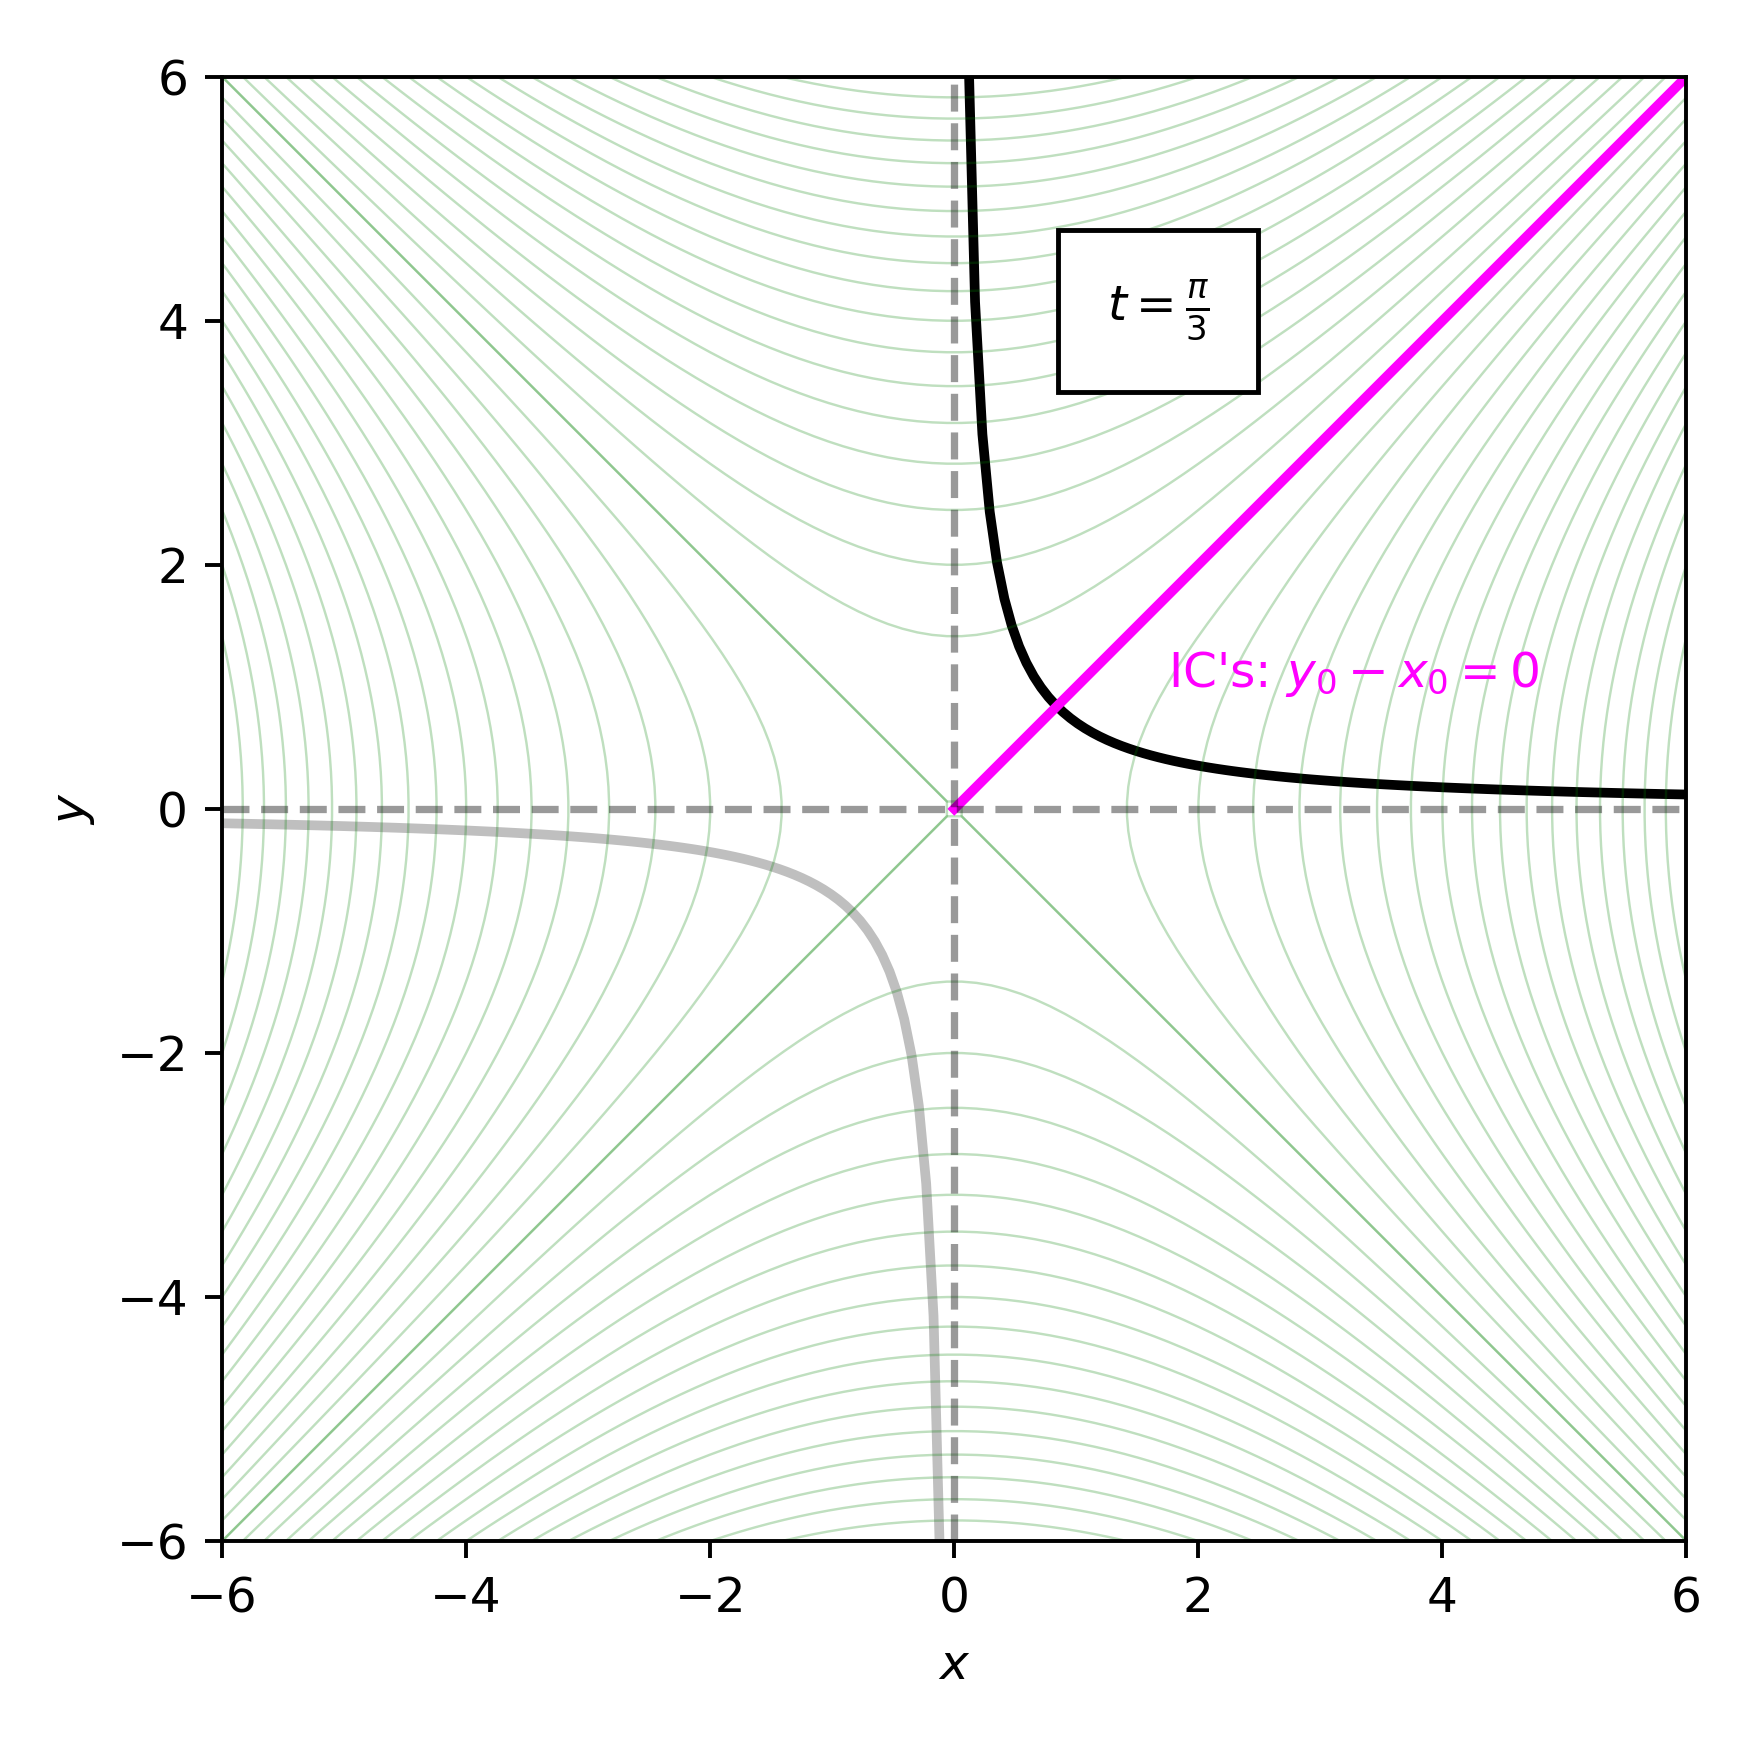

In [20]:
x_left = np.linspace(-6, -0.05, 100)
x_right = np.linspace(0.05, 6, 100)

fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)
##################################################
x = x_left
ax.plot(x,  1/(x*np.sqrt(N)),color="black",lw=2, alpha=0.25)
x = x_right
ax.plot(x,  1/(x*np.sqrt(N)),color="black",lw=2)
    
ax.text(1.25,4,"$t = \\frac{\pi}{3}$",color="black",fontsize=10,zorder=20,
        bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})
##################################################

# invariant sets
x = np.linspace(-6,6,100)
lw = 0.5
# vertical parabolas
for Q in np.arange(0,40,2):
    ax.plot(x, np.sqrt(Q + x**2),color="green",lw=lw,alpha=0.25)
    ax.plot(x,-np.sqrt(Q + x**2),color="green",lw=lw,alpha=0.25)
#horizontal parabolas
for Q in np.arange(0,-40,-2):
    ax.plot( np.sqrt(-Q + x**2),x,color="green",lw=lw,alpha=0.25)
    ax.plot(-np.sqrt(-Q + x**2),x,color="green",lw=lw,alpha=0.25)
# label
# ax.plot([],[],color="green",lw=lw,label="invariant sets")

#selected invariant set
Q = 0
x = np.linspace(0,6,100)
ax.plot(x, np.sqrt(Q + x**2),color="magenta",lw=2,alpha=1)
ax.text(1.75,1,"IC's: $y_0 - x_0 = 0$",color="magenta")

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",alpha=0.4)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

# ax.legend(loc="center",facecolor='white', framealpha=1,fontsize=8)
ax.set_aspect("equal")
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

fig.tight_layout()
plt.show()

## Nodal lines and trajectories from invariant sets

### 3D plot 

In [22]:
%matplotlib notebook

In [23]:
def print_t_label(k, T_string):
    if k == 0:
        return "0"
    elif k == 1:
        return T_string
    else:
        return str(k)+T_string

<IPython.core.display.Javascript object>


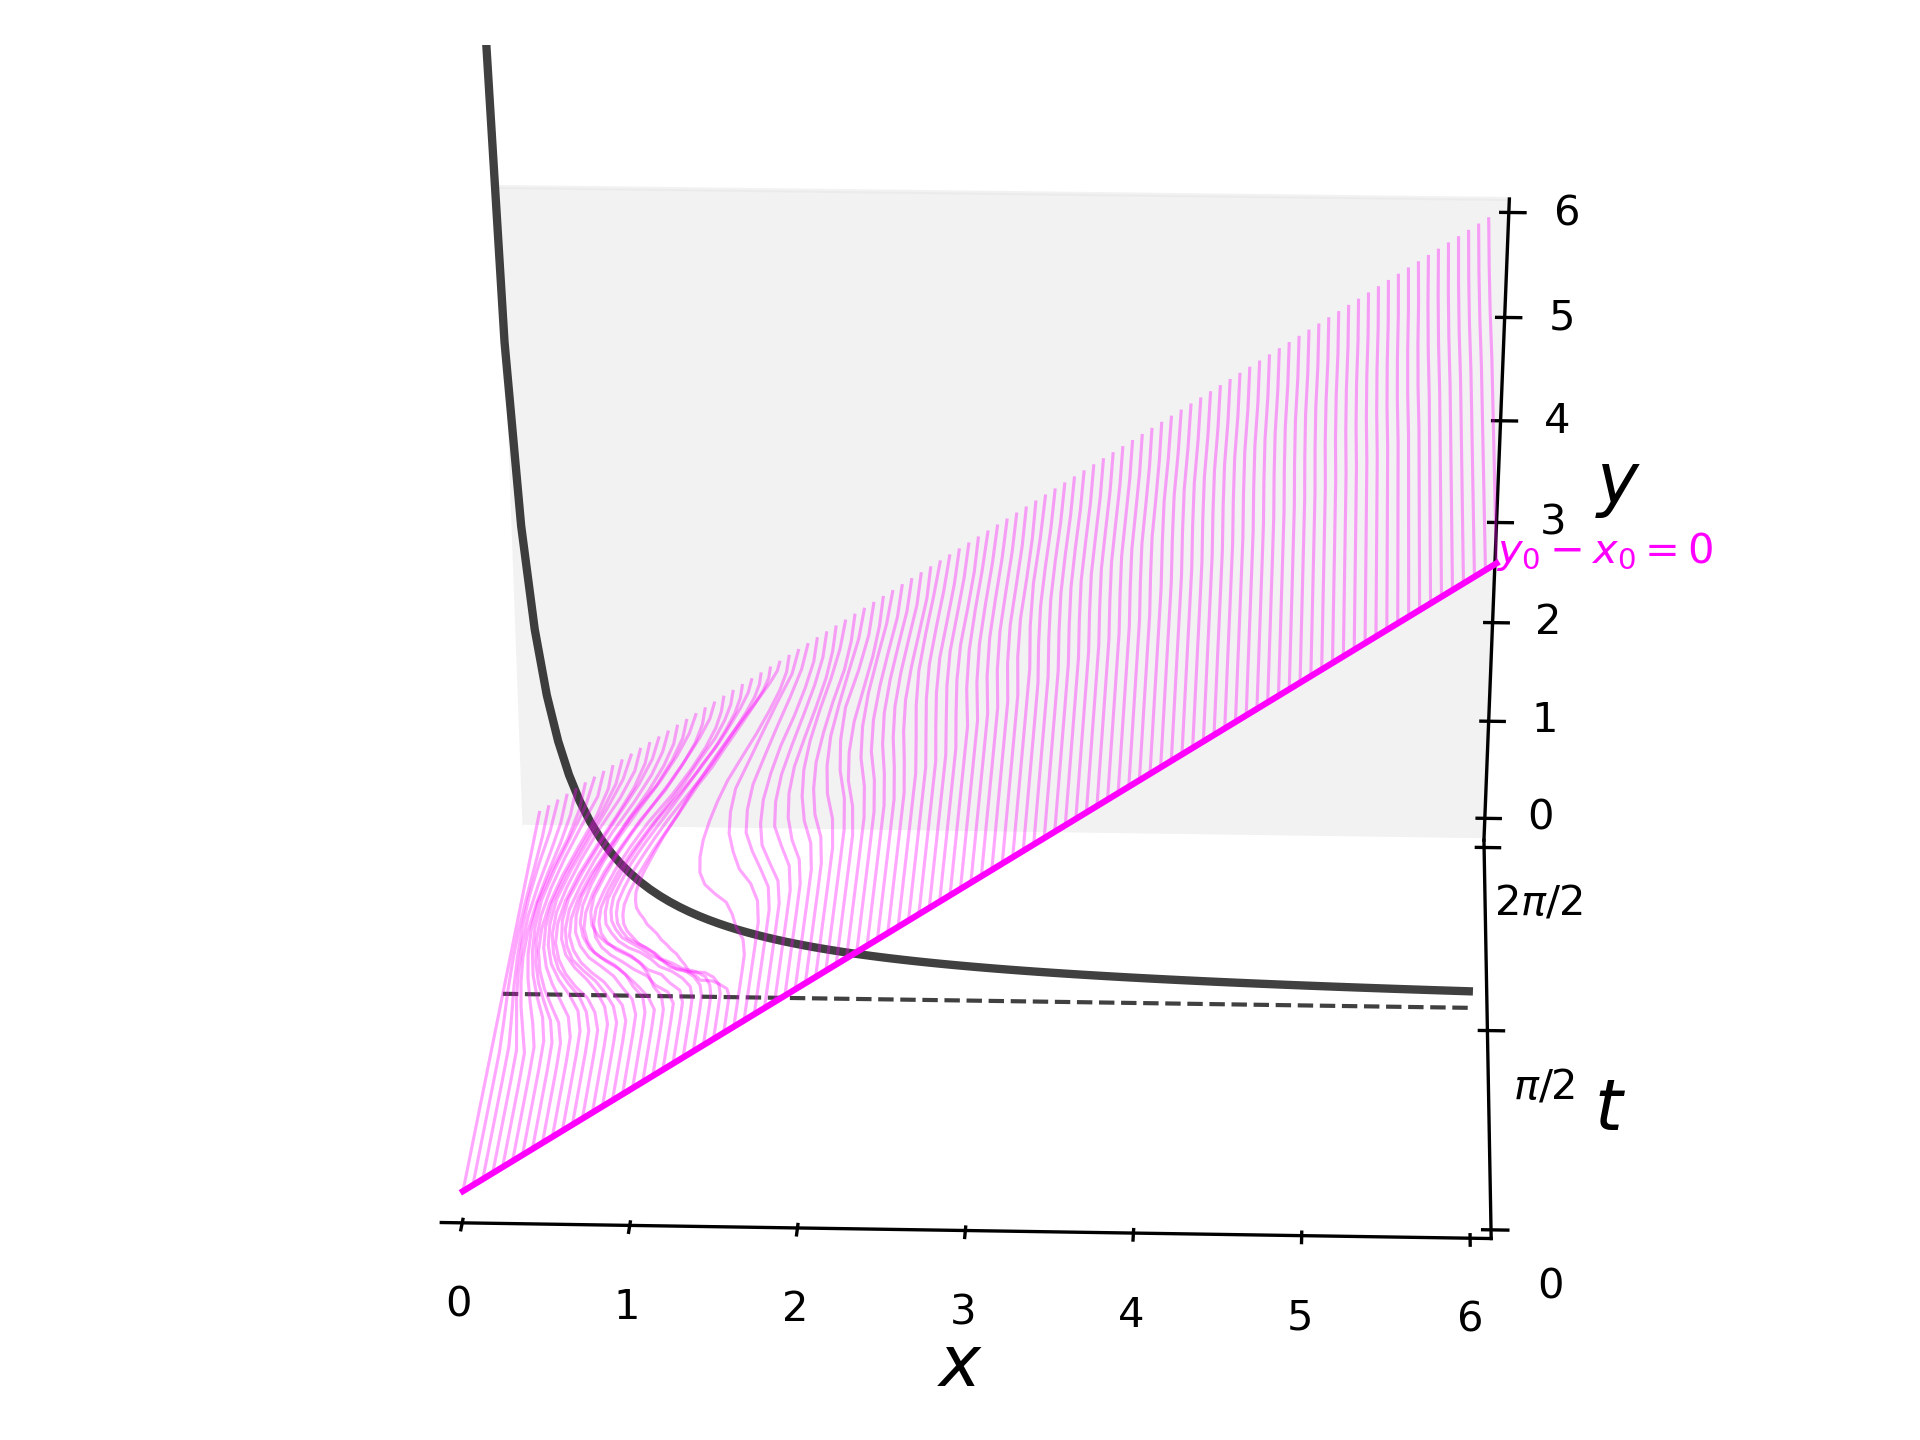

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

Periods = 2
##############################################
#
# PLOT NODAL LINES
#
##############################################
N_nodal = 100
for k in range(Periods+1):
    tN = k*np.ones(N_nodal)*np.pi/2
    if k%2==0:
        colorN = "green"
        alphaN = 0
    else: 
        colorN = "black"
        alphaN = 0.75
    #nodal lines coordinates: left branch
#     xN_left = np.linspace(-6, -0.1, N_nodal)
#     yN_left = (-1)**(k+1)/xN_left
#     ax.plot(xN_left, tN, yN_left, color=colorN,lw=2,linestyle="-",alpha=0.1)

    #nodal lines coordinates: right branch
    xN_right = np.linspace(0.1, 6, N_nodal)
    yN_right = (-1)**(k+1)/xN_right
    ax.plot(xN_right, tN, yN_right, color=colorN,lw=2,linestyle="-",alpha=alphaN)
    
    #bottom reference lines
#     x = np.linspace(-6,6,N_nodal)
    x = np.linspace(0,6,N_nodal)
    ax.plot(x, tN, 0*np.ones(N_nodal),color=colorN,lw=1,linestyle="--",alpha=alphaN)

# ax.plot(xN_left,((Periods+1)*np.pi/2)*np.ones(N_nodal),1/xN_left, color="black", lw=1, linestyle="--", alpha=0.2)
# ax.plot(xN_right,((Periods+1)*np.pi/2)*np.ones(N_nodal),1/xN_right, color="black", lw=1, linestyle="--", alpha=0.75)

# ax.plot(xN_left,((Periods+1)*np.pi/2)*np.ones(N_nodal),-1/xN_left, color="green", lw=1, linestyle="--", alpha=0.2)
# ax.plot(xN_right,((Periods+1)*np.pi/2)*np.ones(N_nodal),-1/xN_right, color="green", lw=1, linestyle="--", alpha=0.5)

# ax.plot(xN_right,(6*np.pi/2)*np.ones(N_nodal), -1*np.ones(N_nodal), color="green", lw=1, linestyle="--", alpha=0.5)
    
#plot plane
# ts = np.linspace(0, 3*np.pi, 200)

# # xs = np.linspace(-6, -0.1, 200)
# # X, T = np.meshgrid(xs, ts)
# # ax.plot_surface(X, T, -1/X ,color="black",alpha=0.1)

# xs = np.linspace(6, 0.1, 200)
# X, T = np.meshgrid(xs, ts)
# ax.plot_surface(X, T, 1/X ,color="black",alpha=0.1)

# ax.plot_surface(X, T, -1/X,color="green",alpha=0.1)
##############################################
#
# PLOT TRAJECTORIES
#
##############################################
t0, tf = [0, Periods*np.pi/2]
time_span = (t0, tf)
color_traj = 'magenta'


for h in np.linspace(0,6,100):
    ic = h*np.array([1,1])
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    line = ax.plot(trajectory[0], np.linspace(*time_span,n), trajectory[1], c=color_traj, lw=0.75, alpha=0.35)


#plot plane of ICs
ts = np.linspace(0, Periods*np.pi/2, 200)
xs = np.linspace(0,6,200)
# X, T = np.meshgrid(xs, ts)
# ax.plot_surface(X, T, X ,color="blue",alpha=0.05,zorder=20)

#plot plane of ICs wit nodal lines
# for k in range(Periods-1):
#     ax.scatter(1,(2*k+1)*np.pi/2,1,color="red",s=10,zorder=40)

# line of ICs    
ax.plot(xs, np.zeros(len(xs)), xs, color="magenta")
ax.text(6, 0, 6, "$y_0 - x_0 = 0$", color="magenta")
    
# intesection of plane of nodal lines with plane of ICs
# ax.plot(np.ones(len(ts)),ts, np.ones(len(ts)), color="red",linestyle="--",lw=1,alpha=1)
# ax.text(1.5,0,1,"$x_0 = y_0 = 1$", color="red")
##############################################
ax.set_yticks(list((np.pi/2)*np.arange(7)))
ax.set_yticklabels([print_t_label(k, "$\pi/2$") for k in range(7)])

ax.set_xlabel("$x$", fontsize=17)
ax.set_ylabel("$t$", fontsize=17)
ax.set_zlabel("$y$", fontsize=17)

ax.set_xlim(0, 6)
ax.set_ylim(0, Periods*np.pi/2)
ax.set_zlim(-0.1, 6)
ax.grid(False)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

fig.tight_layout()

plt.show()

In [24]:
%matplotlib inline

### Planar projection

In [25]:
e1 = np.array([1,1])/np.sqrt(2)

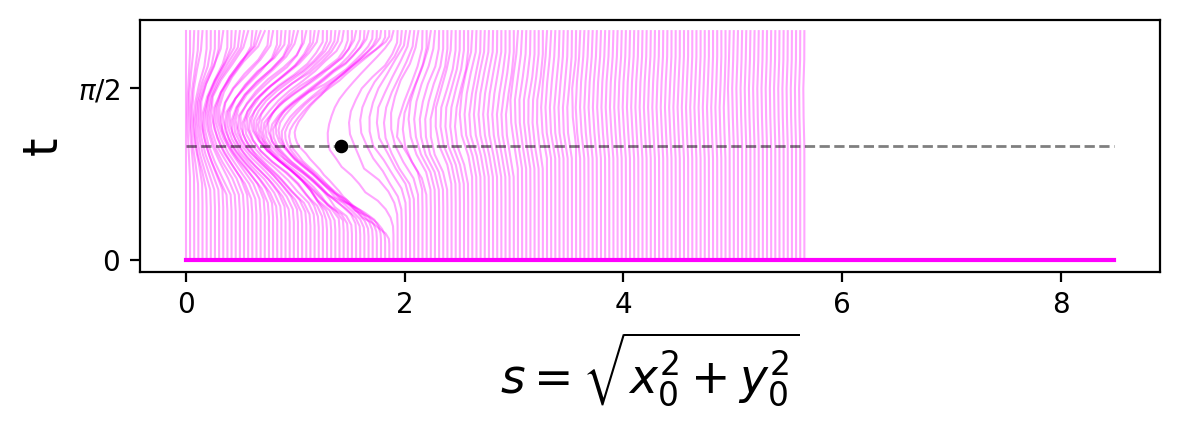

In [36]:
fig,ax1 = plt.subplots(1,1,dpi=200,sharex=True)

Periods = 2
t0, tf = [0, Periods*np.pi/(1+N)]
time_span = (t0, tf)

color_traj = "magenta"

N_traj = 150
for h in np.linspace(0,4,N_traj):
    ic = h*np.array([1,1])
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    traj_projected = [np.dot(e1, trajectory.T[i]) for i in range(len(trajectory.T))]
    ax1.plot(traj_projected, np.linspace(*time_span,n), c=color_traj, lw=0.75, alpha=0.35)

ax1.set_yticks([0, np.pi/2, np.pi])
ax1.set_yticklabels(["0", "$\pi/2$", "$\pi$"])

ax1.set_ylabel("t",fontsize=17)
ax1.set_xlabel("$s = \sqrt{x_0^2 + y_0^2}$",fontsize=17)

ax1.plot([0,np.sqrt(2*6**2)],[0,0],color="magenta")

nodal_line_inv_set_intersection = np.dot(e1, np.array([1,1]))

ax1.scatter(nodal_line_inv_set_intersection,np.pi/(1+N), color="black",s=15)

#reference line
ax1.plot([0,np.sqrt(2*6**2)],[np.pi/(1+N), np.pi/(1+N)],color="black",linestyle="--",lw=1,alpha=0.5)

ax1.set_aspect("equal")

fig.tight_layout()
plt.show()

## Lagrangian descriptor and invariant sets

### Figure: plot LD gradient, nodal lines, and invariant set

In [37]:
# Integration parameters
tau = np.pi

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [600, 600]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [38]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False

In [39]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

In [40]:
LD = LD_forward+LD_backward
LD_gradient = get_gradient_magnitude(LD)

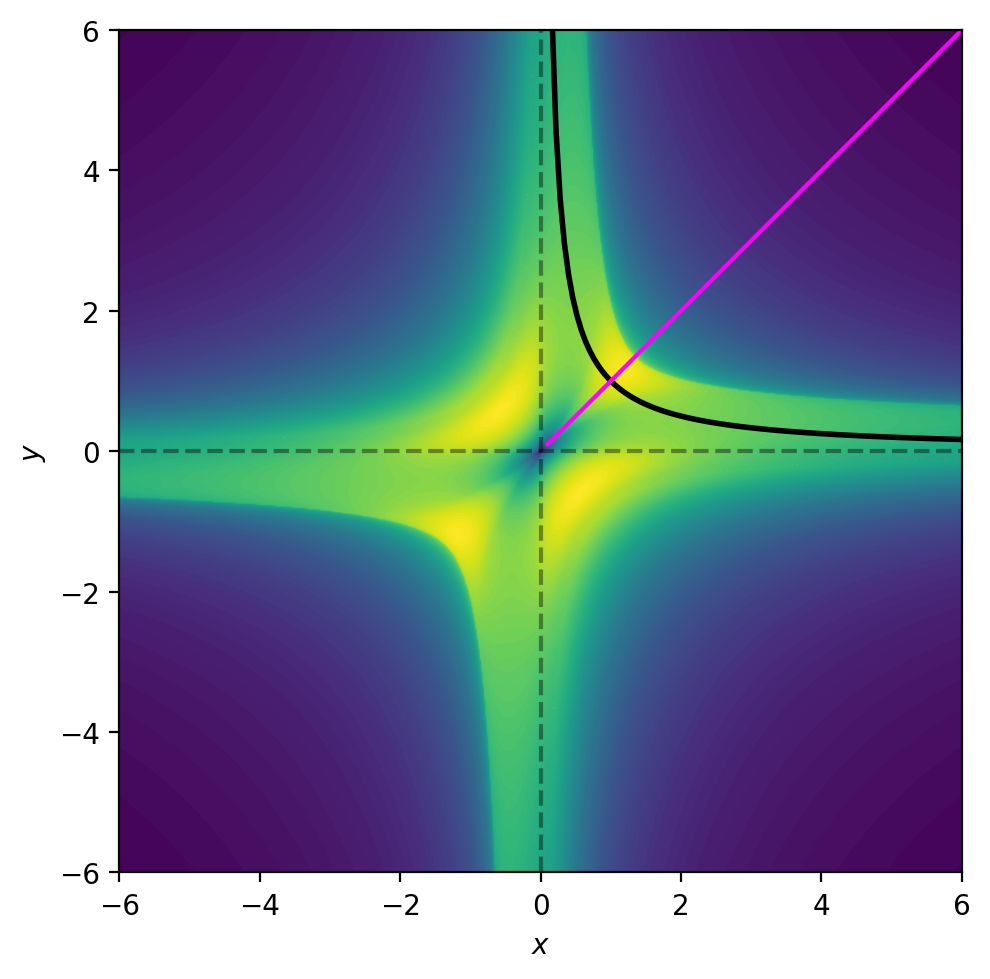

In [41]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

x_right = np.linspace(0.1, 6, 100)
ax.plot(x_right,  1/x_right,color="black",lw=2)
    
# ax.text(1.25,4,"$t = \\frac{\pi}{2}$",color="black",fontsize=10,zorder=20,
#         bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})


x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

ax.contourf(x, y, LD, cmap="viridis",levels=100)

x = np.linspace(0.1,6,300); y = x
invariant_curve = np.column_stack([x, y])
ax.plot(*invariant_curve.T,color="magenta")

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",alpha=0.4)

# ax.text(1.75,1,"IC's: $y_0 - x_0 = 0$",color="magenta")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.set_aspect("equal")
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

fig.tight_layout()


plt.show()

### Restricted domain 

In [60]:
# Integration parameters
tau = 10*np.pi

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-0.01, 0.01]
y_min,y_max = [-0.01, 0.01]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [61]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False

In [62]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

In [63]:
LD = LD_forward+LD_backward
LD_gradient = get_gradient_magnitude(LD)

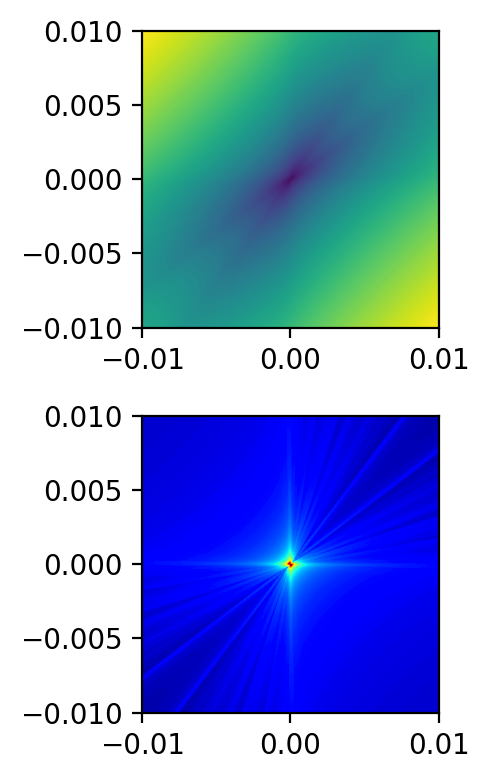

In [64]:
fig,ax = plt.subplots(2,1,dpi=200)

# x_right = np.linspace(0.1, 6, 100)
# ax.plot(x_right,  1/x_right,color="black",lw=2)
    
# # ax.text(1.25,4,"$t = \\frac{\pi}{2}$",color="black",fontsize=10,zorder=20,
# #         bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})


x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

ax[0].contourf(x, y, LD, cmap="viridis",levels=200)
ax[1].contourf(x, y, LD_gradient, cmap="jet",levels=200)

# x = np.linspace(0.1,6,300); y = x
# invariant_curve = np.column_stack([x, y])
# ax.plot(*invariant_curve.T,color="magenta")

# #reference lines
# ax.plot([-6,6],[0,0],color="black",linestyle="--",alpha=0.4)
# ax.plot([0,0],[-6,6],color="black",linestyle="--",alpha=0.4)

# ax.text(1.75,1,"IC's: $y_0 - x_0 = 0$",color="magenta")

# ax.set_xlabel("$x$")
# ax.set_ylabel("$y$")

ax[0].set_aspect("equal")
ax[1].set_aspect("equal")
# ax.set_xlim(-6,6)
# ax.set_ylim(-6,6)

fig.tight_layout()

plt.show()

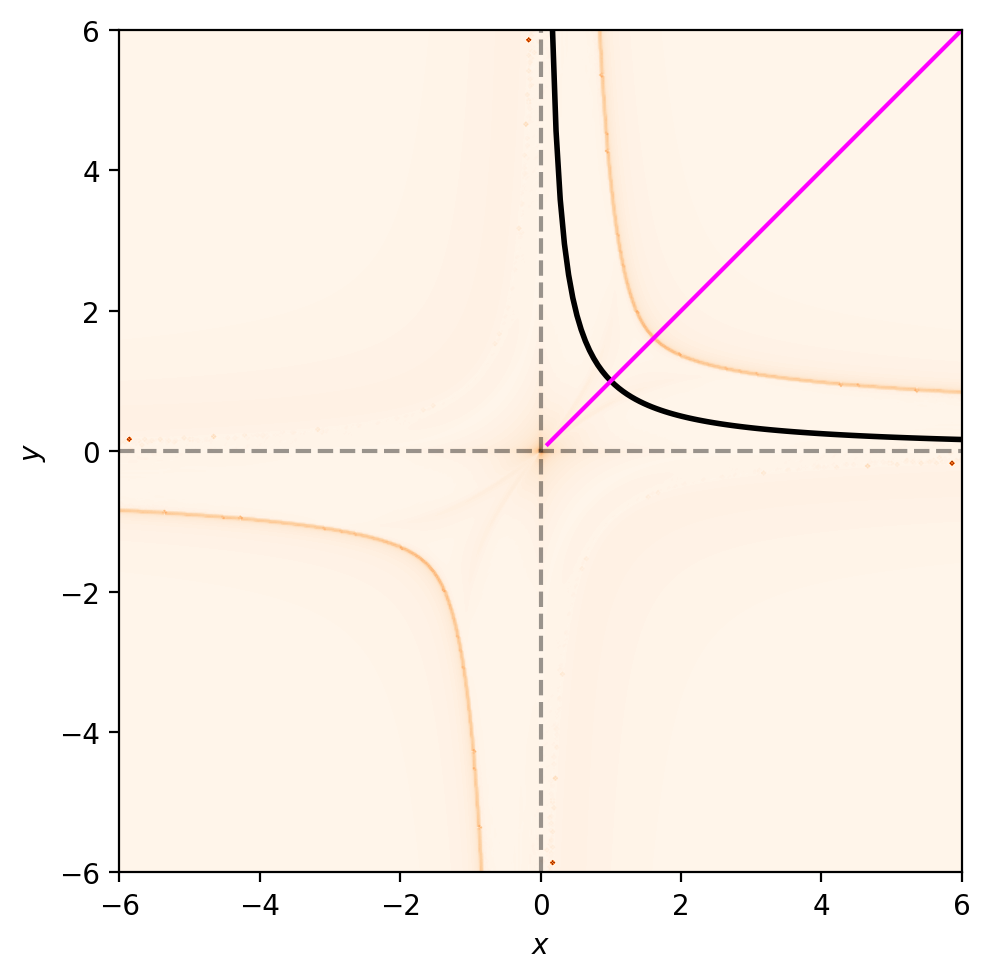

In [8]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

x_right = np.linspace(0.1, 6, 100)
ax.plot(x_right,  1/x_right,color="black",lw=2)
    
# ax.text(1.25,4,"$t = \\frac{\pi}{2}$",color="black",fontsize=10,zorder=20,
#         bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})


x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

LD_gradient = get_gradient_magnitude(LD)
ax.contourf(x, y, LD_gradient, cmap="Oranges",levels=100)

x = np.linspace(0.1,6,300); y = x
invariant_curve = np.column_stack([x, y])
ax.plot(*invariant_curve.T,color="magenta")

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",alpha=0.4)

# ax.text(1.75,1,"IC's: $y_0 - x_0 = 0$",color="magenta")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.set_aspect("equal")
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

fig.tight_layout()


plt.show()

### Interpolation of LD data for evaluation on invariant set

In [9]:
from scipy.interpolate import RectBivariateSpline
from scipy.signal import find_peaks

In [10]:
def spline_wrap(v):
    return spline(v[0],v[1]).squeeze()

def fspline(positions):
    surface = np.array(list(map(spline_wrap,positions)))
    return surface

In [11]:
# Mesh parameters
x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

spline = RectBivariateSpline(x,y,LD_gradient)

In [12]:
LD_fspline = fspline

In [13]:
# invariant curve coordinates
x = np.linspace(0,6,300); y = x

invariant_curve = np.column_stack([x, y])

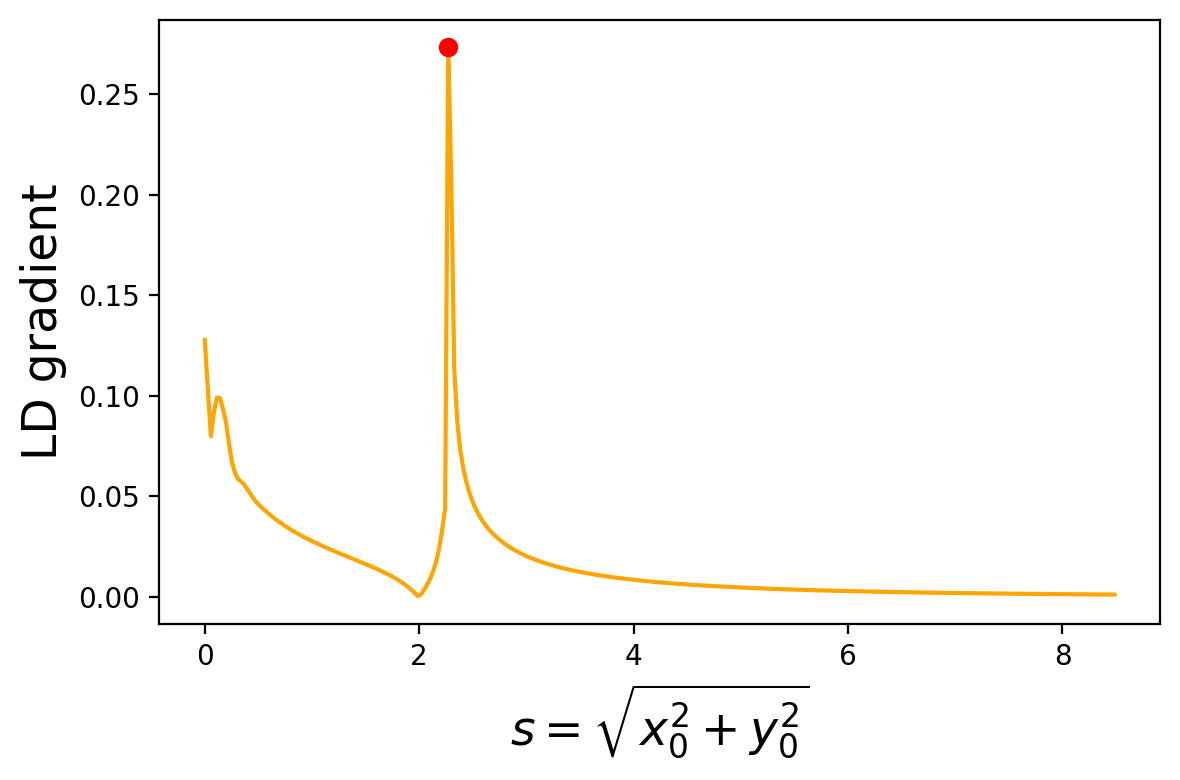

In [23]:
fig = plt.figure(dpi=200)

data = LD_fspline(invariant_curve)
axis = np.linalg.norm(invariant_curve, axis=1)
plt.plot(axis, data, color="orange")

# plot peaks
peaks, _ = find_peaks(data, height=0.25)
plt.plot(axis[peaks], data[peaks], "o", color="red")

plt.xlabel("$s = \sqrt{x_0^2 + y_0^2}$",fontsize=17)
plt.ylabel("LD gradient",fontsize=17)

fig.tight_layout()
plt.show()

### Position of LD singularities and separatrix of trajectories

In [51]:
e1 = np.array([1,1])/np.sqrt(2)

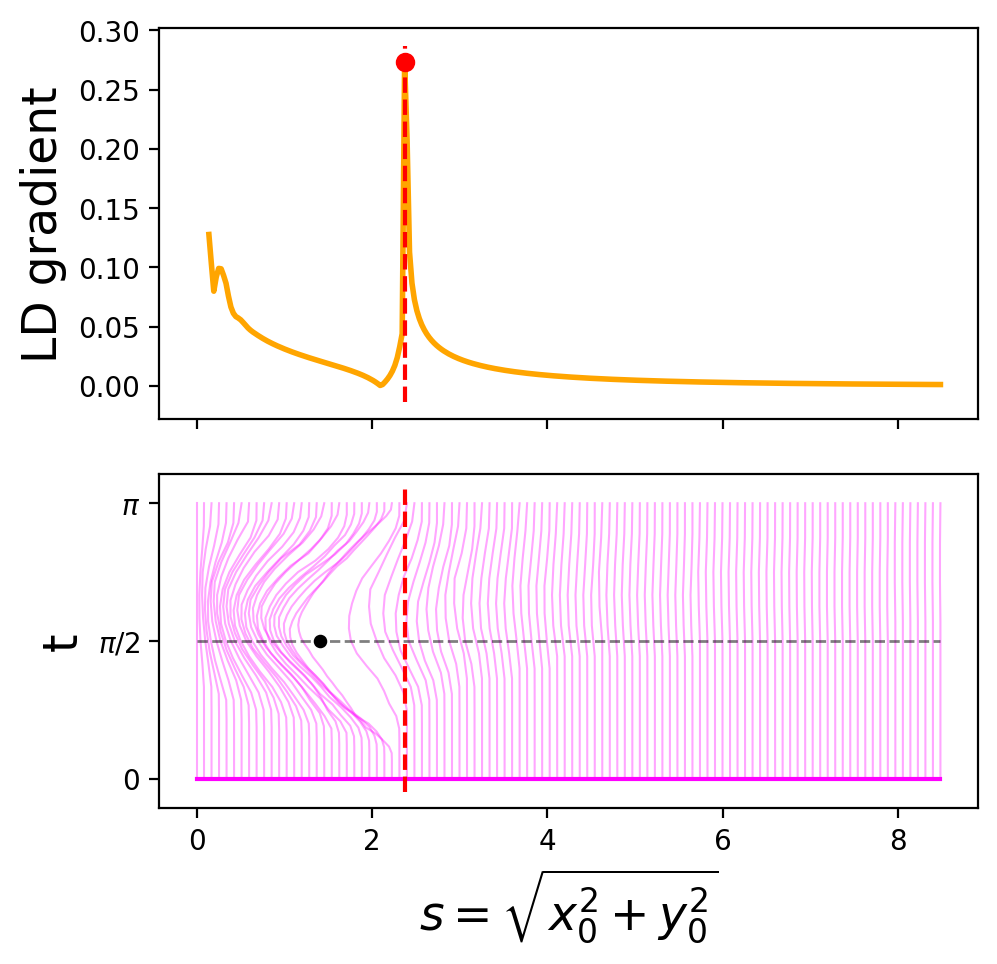

In [70]:
fig,(ax2,ax1) = plt.subplots(2,1,figsize=(5,5),dpi=200,sharex=True)


color_traj = "magenta"

for h in np.linspace(0,6,100):
    ic = h*np.array([1,1])
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    traj_projected = [np.dot(e1, trajectory.T[i]) for i in range(len(trajectory.T))]
    ax1.plot(traj_projected, np.linspace(*time_span,n), c=color_traj, lw=0.75, alpha=0.35)

ax1.set_yticks([0, np.pi/2, np.pi])
ax1.set_yticklabels(["0", "$\pi/2$", "$\pi$"])

ax1.set_ylabel("t",fontsize=17)
ax1.set_xlabel("$s = \sqrt{x_0^2 + y_0^2}$",fontsize=17)

ax1.plot([0,np.sqrt(2*6**2)],[0,0],color="magenta")

nodal_line_inv_set_intersection = np.dot(e1, np.array([1,1]))

ax1.scatter(nodal_line_inv_set_intersection,np.pi/2, color="black",s=15)

#reference line
ax1.plot([0,np.sqrt(2*6**2)],[np.pi/2, np.pi/2],color="black",linestyle="--",lw=1,alpha=0.5)

ax1.set_aspect("equal")

axis = np.linalg.norm(invariant_curve, axis=1)
ax2.plot(axis, data, color="orange",alpha=1,lw=2)
ax2.set_ylabel("LD gradient",fontsize=17)
##############################################
# plot peaks
peaks, _ = find_peaks(data, height=0.25)
y1_lims = ax2.get_ylim()
ax2.plot(2*[axis[peaks]], y1_lims, color="red", linestyle="--", lw=1.5, alpha=1)
ax2.scatter(axis[peaks], data[peaks], color="red",zorder=20)

y0_lims = ax1.get_ylim()
ax1.plot(2*[axis[peaks]], y0_lims, color="red", linestyle="--", lw=1.5, alpha=1)
##############################################

# ax2.set_ylim(0, 0.28)
# ax1.set_ylim(0, np.pi)
fig.tight_layout()
plt.show()

Back to LD

In [74]:
%matplotlib notebook

<IPython.core.display.Javascript object>


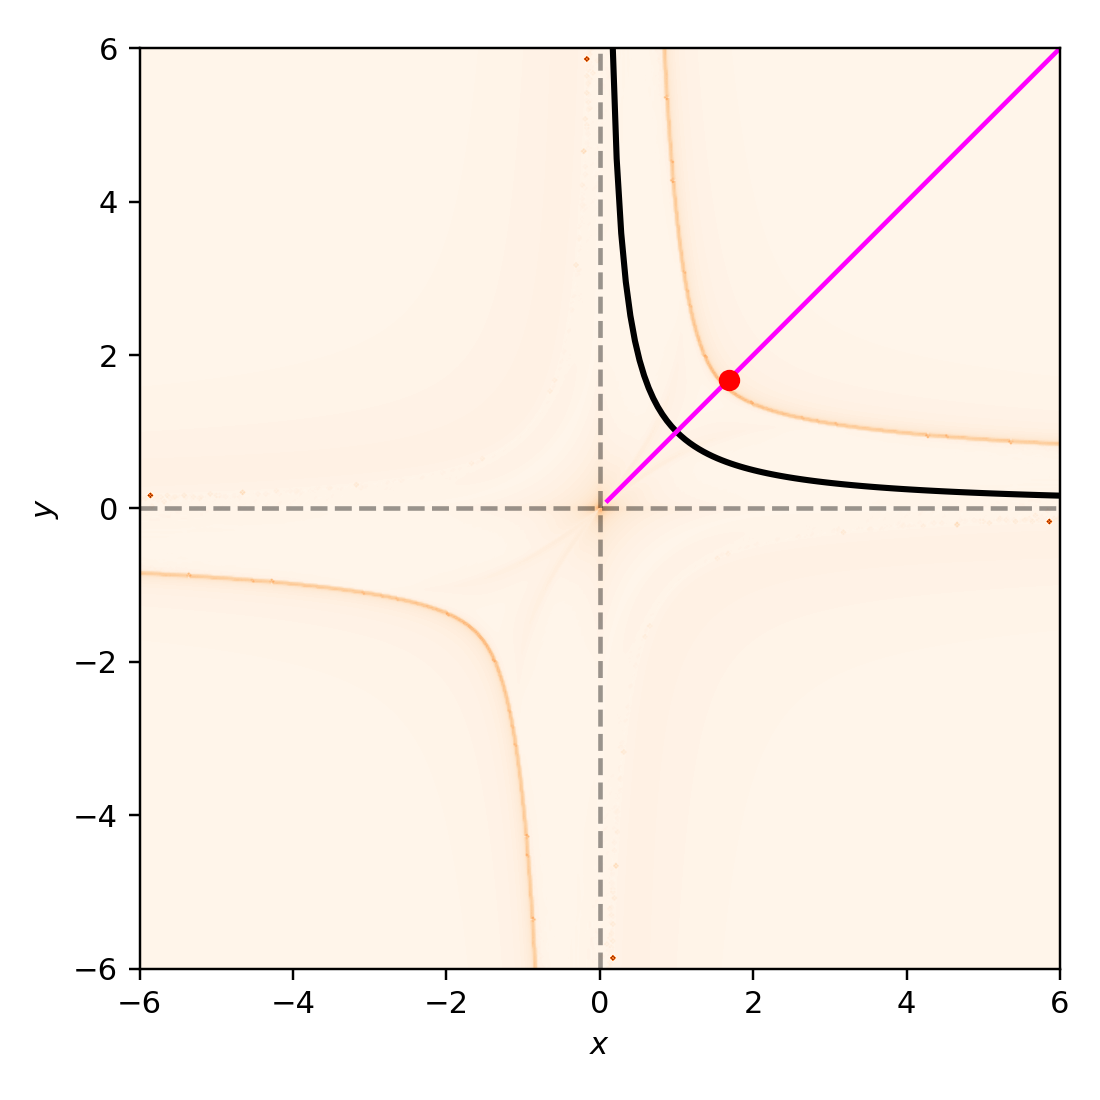

In [77]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

x_right = np.linspace(0.1, 6, 100)
ax.plot(x_right,  1/x_right,color="black",lw=2)
    
# ax.text(1.25,4,"$t = \\frac{\pi}{2}$",color="black",fontsize=10,zorder=20,
#         bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})


x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

LD_gradient = get_gradient_magnitude(LD)
ax.contourf(x, y, LD_gradient, cmap="Oranges",levels=100)

x = np.linspace(0.1,6,300); y = x
invariant_curve = np.column_stack([x, y])
ax.plot(*invariant_curve.T,color="magenta")

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",alpha=0.4)

# plot peak position
ax.scatter(np.sqrt(axis[peaks]**2/2), np.sqrt(axis[peaks]**2/2), color="red",zorder=20)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.set_aspect("equal")
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

fig.tight_layout()

plt.show()

# Vector field

In [53]:
x_min, x_max = [-0.75, 0.75]
y_min, y_max = [-0.75, 0.75]
# x = np.linspace(x_min, x_max, 2000)
# y = np.linspace(y_min, y_max, 2000)
x = np.linspace(x_min, x_max, 3)
y = np.linspace(y_min, y_max, 3)

X,Y = np.meshgrid(x,y)
t = np.pi-0.1

In [54]:
#vector field
G = 1 + 2*(X*Y)*np.cos(2*t) + (X*Y)**2
Vx = -np.sin(2*t)*Y/G
Vy = -np.sin(2*t)*X/G

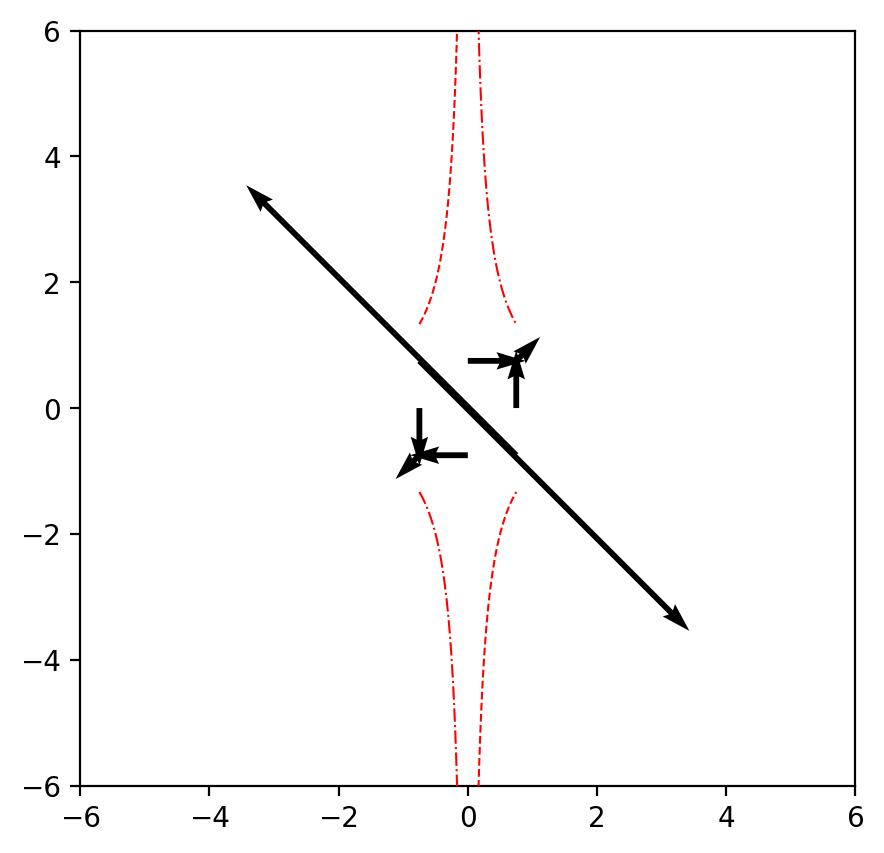

In [55]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

##############################################
# plot nodal lines FIRST
colorN = "red"
k = 0
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=1, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=1, zorder=10)

ax.plot([],[],color="red",linestyle="--",lw=1,label="($x_N, y_N$); $t_N = 0$")

# plot nodal lines SECOND
colorN = "red"
k = 1
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="-.",lw=0.75, alpha=1, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="-.",lw=0.75, alpha=1, zorder=10)

ax.plot([],[],color="red",linestyle="-.",lw=1,label="($x_N, y_N$); $t_N = \pi/2$")

##############################################
ax.quiver(X,Y,Vx,Vy,scale=2)

ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
plt.show()

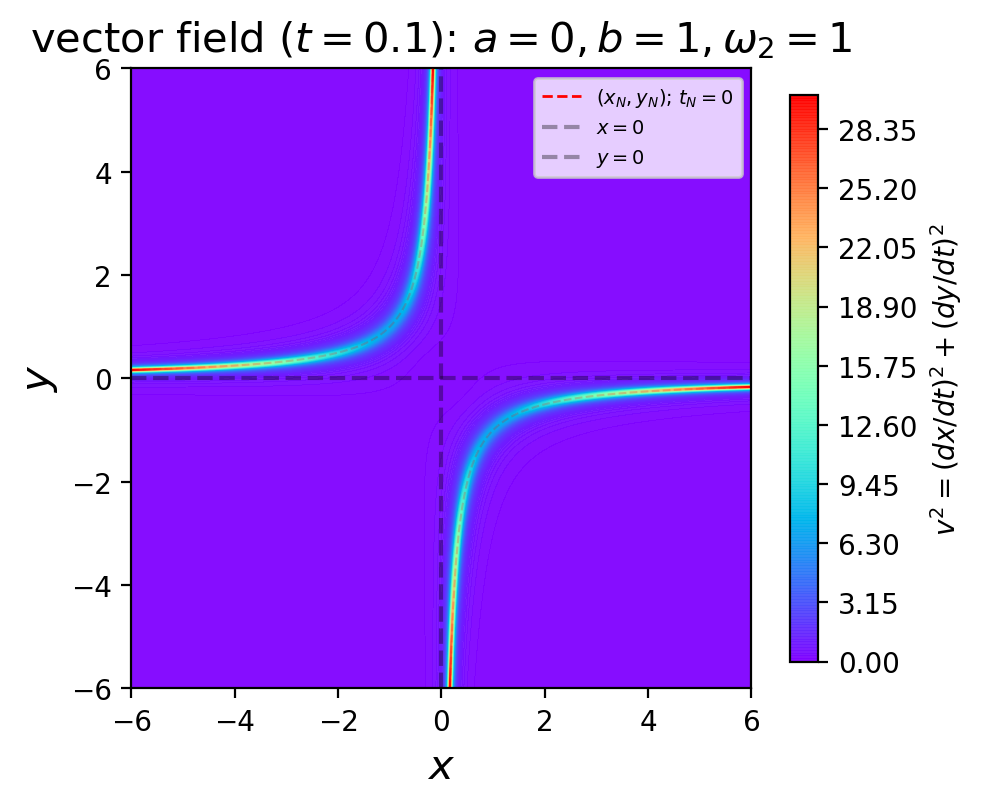

In [289]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

n_levels = 200
cmap = "rainbow"

##############################################
#CONTOUR PLOT
contour1 = ax.contourf(X,Y,np.sqrt(Vx**2 + Vy**2),levels=n_levels,cmap=cmap, alpha=0.95)
cbar = fig.colorbar(contour1, extend='both', shrink=0.75, orientation="vertical", ax=ax)
cbar.set_label("$v^2 = (dx/dt)^2 + (dy/dt)^2$", fontsize=10, rotation=90)

##############################################
# plot nodal lines
colorN = "red"
k = 0
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.2, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.2, zorder=10)

ax.plot([],[],color="red",linestyle="--",lw=1,label="($x_N, y_N$); $t_N = 0$")

##############################################
# dashed lines - reference lines
ax.plot((0,0),(-6,6), color="black", label="$x = 0$", linestyle="--", lw=1.5, alpha=0.35)
ax.plot((-6,6),(0,0), color="black", label="$y = 0$", linestyle="--", lw=1.5, alpha=0.35)

##############################################
title = 'vector field ($t = 0.1$): $a=0, b=1, \omega_2=1$'
ax.set_title(title, fontsize=15)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#axis labels
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)

#legends
ax.legend(loc="best", fontsize=7)

ax.set_aspect(1)
plt.show()

#### Trajectories

In [290]:
a, b, omega2, t0 = [0, 1, 1, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, 0])

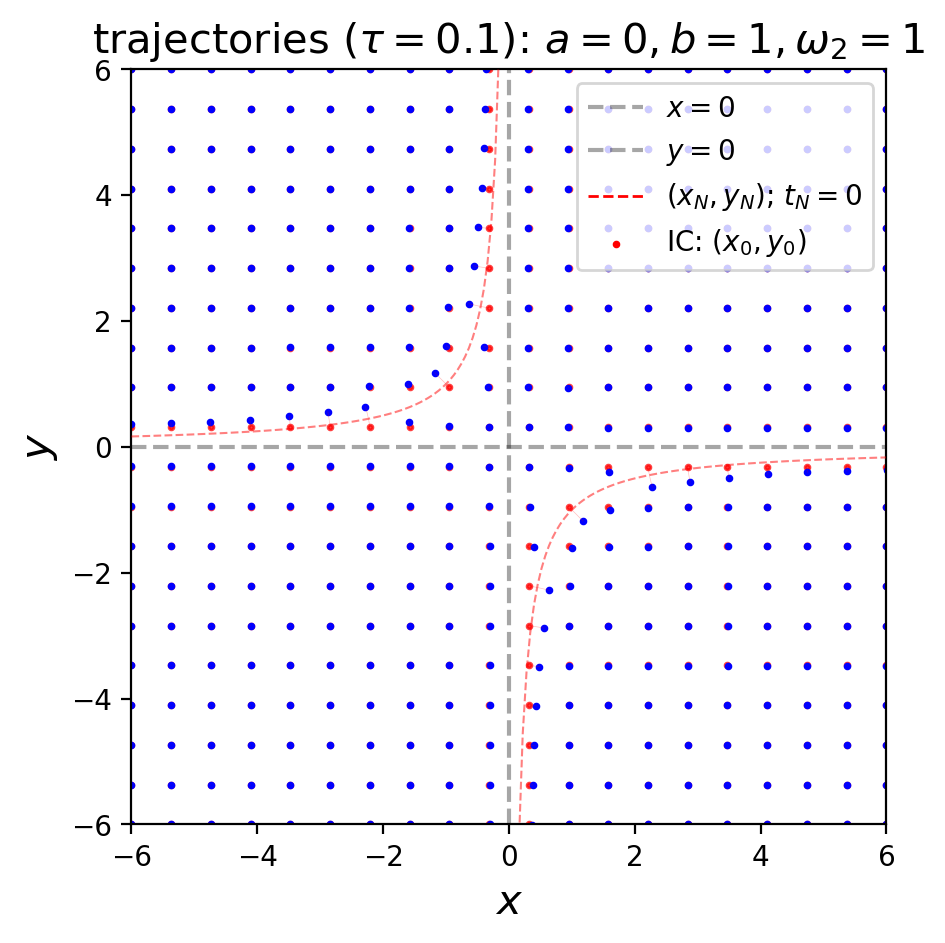

In [291]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

# n_levels = 200
# cmap = "rainbow"

# ##############################################
# #CONTOUR PLOT
# contour1 = ax.contourf(X,Y,np.sqrt(Vx**2 + Vy**2),levels=n_levels,cmap=cmap, alpha=0.95)
# cbar = fig.colorbar(contour1, extend='both', shrink=0.9, orientation="vertical", ax=ax)
# cbar.set_label("$v^2 = (dx/dt)^2 + (dy/dt)^2$", fontsize=15, rotation=90)

# dashed lines - reference lines
xN_color = "black"
ax.plot((0,0),(-6,6), color=xN_color, label="$x = 0$", linestyle="--", lw=1.5, alpha=0.35)
ax.plot((-6,6),(0,0), color=xN_color, label="$y = 0$", linestyle="--", lw=1.5, alpha=0.35)

# ##############################################
# plot nodal lines
colorN = "red"
k = 0
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.5, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.5, zorder=10)

ax.plot([],[],color="red",linestyle="--",lw=1,label="($x_N, y_N$); $t_N = 0$")
# ##############################################
# #vertical time lines
# for k in range(5):
#     ax.plot((k*np.pi, k*np.pi), (-6, 6), color="black", linestyle="--", lw=0.75, alpha=0.75)
#     ax.text(k*np.pi+0.1, -5.5, "t = "+str(k)+"$\pi$", rotation=90)

##############################################
#
# PLOT TRAJECTORIES
#
##############################################
# t0, tf = [0, np.pi/2-1]
t0, tf = [0, 0.1]
time_span = (t0, tf)
color_traj = 'red'

x_min, x_max = [-6, 6]
y_min, y_max = [-6, 6]
x = np.linspace(x_min, x_max, 20)
y = np.linspace(y_min, y_max, 20)
X,Y = np.meshgrid(x,y)
ICs = np.column_stack([X.flatten(), Y.flatten()])

for ic in ICs:
    ax.scatter(*ic, color=color_traj,s=3,alpha=0.75)
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(trajectory[0], trajectory[1], c=color_traj, lw=0.25, alpha=0.25)
    ax.scatter(trajectory[0][-1], trajectory[1][-1], color="blue",s=3, alpha=1)

ax.scatter([], [], color=color_traj,s=3, label="IC: ($x_0, y_0$)", alpha=1)
    
##############################################
#
# CUSTOMISE APPEARANCE
#
##############################################
title = 'trajectories ($\\tau = 0.1$): $a=0, b=1, \omega_2=1$'
ax.set_title(title, fontsize=15)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#axis labels
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)

# #legends
ax.legend(loc="best")
# ##############################################

ax.set_aspect(1)
plt.show()

#### Lagrangian descriptor

In [212]:
# Integration parameters
tau = 0.1

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [213]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False#[(box_x_min, box_x_max)]

In [214]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

Text(0, 0.5, '$y$')

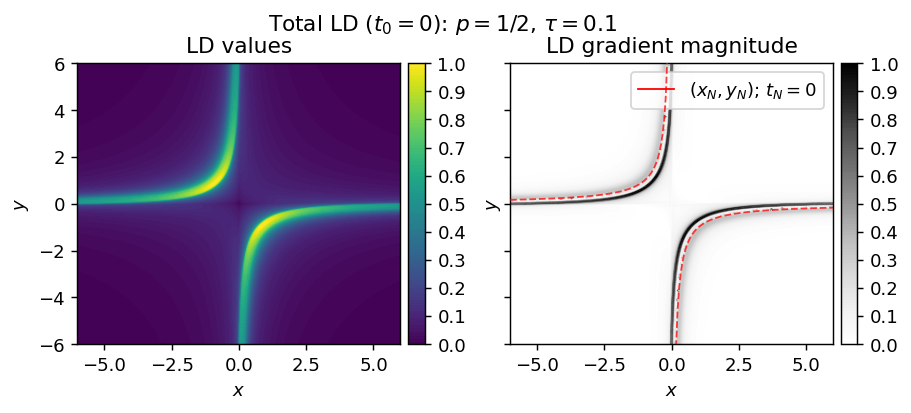

In [221]:
LD = LD_forward+LD_backward
LD_gradient = get_gradient_magnitude(LD)

title = "Total LD ($t_0 = 0$): $p = 1/2$, $\\tau = $"+str(tau)
fig,ax = draw_ld_pair(LD, LD_gradient, grid_parameters, title, interactive=False,cmap_gradient='Greys')
ax1, ax2 = ax
#############################################
# plot nodal lines
colorN = "red"
k = 0
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax2.plot(xN, yN, color=colorN, linestyle="--", lw=1, alpha=0.75, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax2.plot(xN, yN, color=colorN, linestyle="--", lw=1, alpha=0.75, zorder=10)

ax2.plot([],[],color="red",lw=1,label="($x_N, y_N$); $t_N = 0$")
#############################################

ax2.set_xlim(x_min,x_max)
ax2.set_ylim(y_min,y_max)

ax2.legend(loc="best")
ax1.set_ylabel("$y$")
ax2.set_ylabel("$y$")

### $t = \pi/4$

#### Vector field

In [292]:
x_min, x_max = [-6, 6]
y_min, y_max = [-6, 6]
x = np.linspace(x_min, x_max, 2000)
y = np.linspace(y_min, y_max, 2000)

X,Y = np.meshgrid(x,y)
t = np.pi/4

In [293]:
#vector field
G = 1 + 2*(X*Y)*np.cos(2*t) + (X*Y)**2
Vx = -np.sin(2*t)*Y/G
Vy = -np.sin(2*t)*X/G

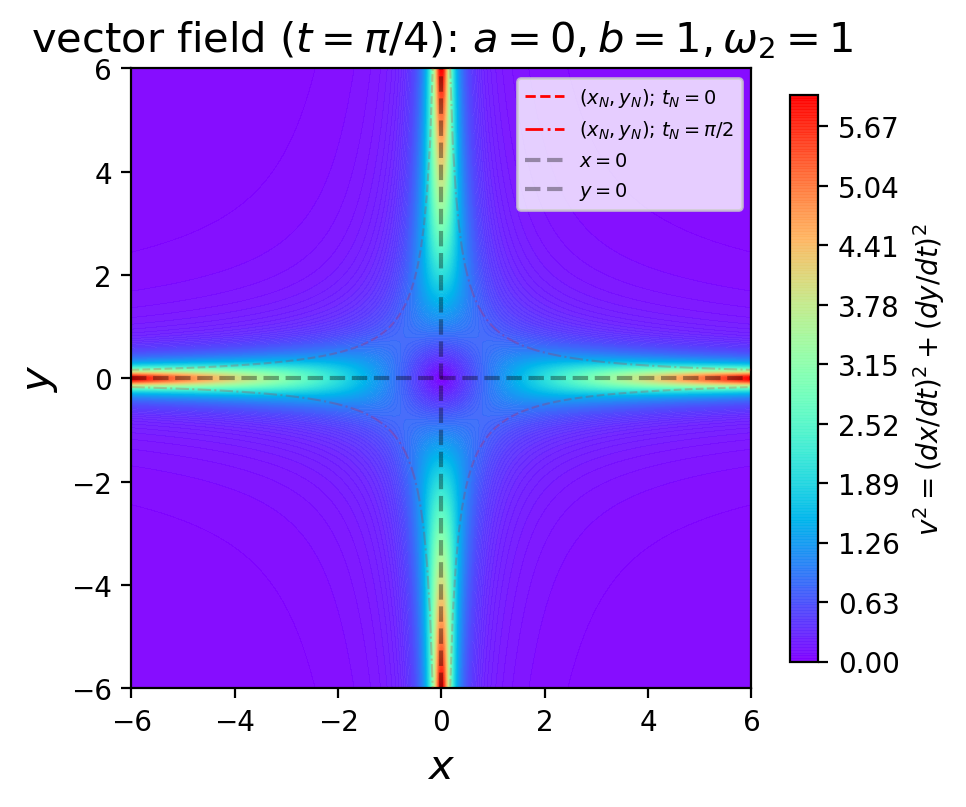

In [297]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

n_levels = 200
cmap = "rainbow"

##############################################
#CONTOUR PLOT
contour1 = ax.contourf(X,Y,np.sqrt(Vx**2 + Vy**2),levels=n_levels,cmap=cmap, alpha=0.95)
cbar = fig.colorbar(contour1, extend='both', shrink=0.75, orientation="vertical", ax=ax)
cbar.set_label("$v^2 = (dx/dt)^2 + (dy/dt)^2$", fontsize=10, rotation=90)

##############################################
# plot nodal lines FIRST
colorN = "red"
k = 0
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.2, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.2, zorder=10)

ax.plot([],[],color="red",linestyle="--",lw=1,label="($x_N, y_N$); $t_N = 0$")

# plot nodal lines SECOND
colorN = "red"
k = 1
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="-.",lw=0.75, alpha=0.2, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="-.",lw=0.75, alpha=0.2, zorder=10)

ax.plot([],[],color="red",linestyle="-.",lw=1,label="($x_N, y_N$); $t_N = \pi/2$")

##############################################
# dashed lines - reference lines
ax.plot((0,0),(-6,6), color="black", label="$x = 0$", linestyle="--", lw=1.5, alpha=0.35)
ax.plot((-6,6),(0,0), color="black", label="$y = 0$", linestyle="--", lw=1.5, alpha=0.35)

##############################################
title = 'vector field ($t = \pi/4$): $a=0, b=1, \omega_2=1$'
ax.set_title(title, fontsize=15)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#axis labels
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)

#legends
ax.legend(loc="best", fontsize=7)

ax.set_aspect(1)
plt.show()

#### Trajectories

In [290]:
a, b, omega2, t0 = [0, 1, 1, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, 0])

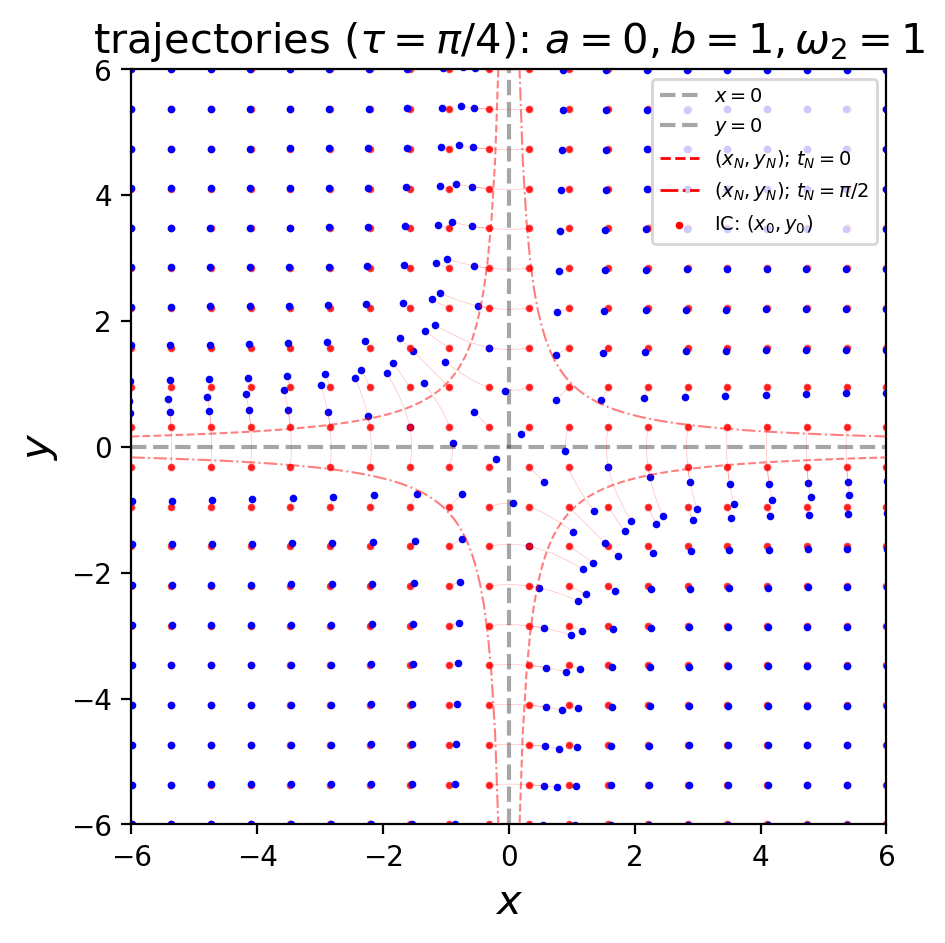

In [300]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

# n_levels = 200
# cmap = "rainbow"

# ##############################################
# #CONTOUR PLOT
# contour1 = ax.contourf(X,Y,np.sqrt(Vx**2 + Vy**2),levels=n_levels,cmap=cmap, alpha=0.95)
# cbar = fig.colorbar(contour1, extend='both', shrink=0.9, orientation="vertical", ax=ax)
# cbar.set_label("$v^2 = (dx/dt)^2 + (dy/dt)^2$", fontsize=15, rotation=90)

# dashed lines - reference lines
xN_color = "black"
ax.plot((0,0),(-6,6), color=xN_color, label="$x = 0$", linestyle="--", lw=1.5, alpha=0.35)
ax.plot((-6,6),(0,0), color=xN_color, label="$y = 0$", linestyle="--", lw=1.5, alpha=0.35)

# ##############################################
# plot nodal lines FIRST
colorN = "red"
k = 0
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.5, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.5, zorder=10)

ax.plot([],[],color="red",linestyle="--",lw=1,label="($x_N, y_N$); $t_N = 0$")

# plot nodal lines SECOND
colorN = "red"
k = 1
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="-.",lw=0.75, alpha=0.5, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="-.",lw=0.75, alpha=0.5, zorder=10)

ax.plot([],[],color="red",linestyle="-.",lw=1,label="($x_N, y_N$); $t_N = \pi/2$")

# ##############################################
# #vertical time lines
# for k in range(5):
#     ax.plot((k*np.pi, k*np.pi), (-6, 6), color="black", linestyle="--", lw=0.75, alpha=0.75)
#     ax.text(k*np.pi+0.1, -5.5, "t = "+str(k)+"$\pi$", rotation=90)

##############################################
#
# PLOT TRAJECTORIES
#
##############################################
# t0, tf = [0, np.pi/2-1]
t0, tf = [0, np.pi/4]
time_span = (t0, tf)
color_traj = 'red'

x_min, x_max = [-6, 6]
y_min, y_max = [-6, 6]
x = np.linspace(x_min, x_max, 20)
y = np.linspace(y_min, y_max, 20)
X,Y = np.meshgrid(x,y)
ICs = np.column_stack([X.flatten(), Y.flatten()])

for ic in ICs:
    ax.scatter(*ic, color=color_traj,s=3,alpha=0.75)
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(trajectory[0], trajectory[1], c=color_traj, lw=0.25, alpha=0.25)
    ax.scatter(trajectory[0][-1], trajectory[1][-1], color="blue",s=3, alpha=1)

ax.scatter([], [], color=color_traj,s=3, label="IC: ($x_0, y_0$)", alpha=1)
    
##############################################
#
# CUSTOMISE APPEARANCE
#
##############################################
title = 'trajectories ($\\tau = \pi/4$): $a=0, b=1, \omega_2=1$'
ax.set_title(title, fontsize=15)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#axis labels
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)

# #legends
ax.legend(loc="best", fontsize=7)
# ##############################################

ax.set_aspect(1)
plt.show()

#### Lagrangian descriptor

In [328]:
# Integration parameters
tau = np.pi/4

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [329]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False#[(box_x_min, box_x_max)]

In [330]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

Text(0, 0.5, '$y$')

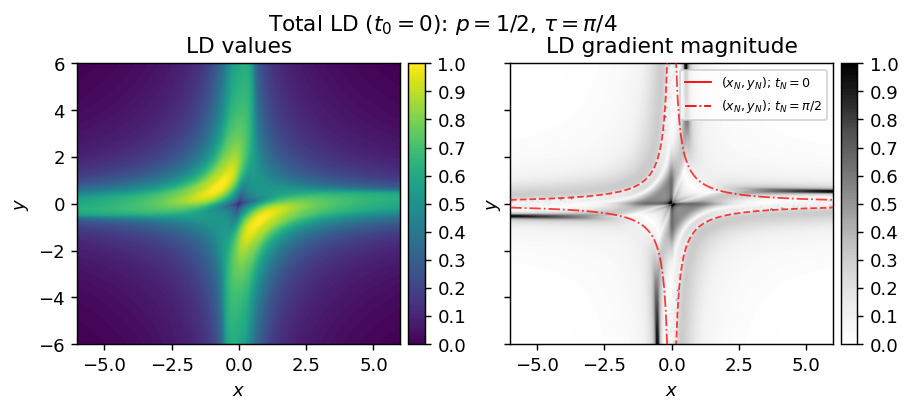

In [331]:
LD = LD_forward+LD_backward
LD_gradient = get_gradient_magnitude(LD)

title = "Total LD ($t_0 = 0$): $p = 1/2$, $\\tau = \pi/4$"
fig,ax = draw_ld_pair(LD, LD_gradient, grid_parameters, title, interactive=False,cmap_gradient='Greys')
ax1, ax2 = ax
#############################################
# plot nodal lines FIRST
colorN = "red"
k = 0
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax2.plot(xN, yN, color=colorN, linestyle="--", lw=1, alpha=0.75, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax2.plot(xN, yN, color=colorN, linestyle="--", lw=1, alpha=0.75, zorder=10)

ax2.plot([],[],color="red",lw=1,label="($x_N, y_N$); $t_N = 0$")

# plot nodal lines SECOND
colorN = "red"
k = 1
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax2.plot(xN, yN, color=colorN, linestyle="-.", lw=1, alpha=0.75, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax2.plot(xN, yN, color=colorN, linestyle="-.",lw=1, alpha=0.75, zorder=10)

ax2.plot([],[],color="red",linestyle="-.",lw=1,label="($x_N, y_N$); $t_N = \pi/2$")

#############################################

ax2.set_xlim(x_min,x_max)
ax2.set_ylim(y_min,y_max)

ax2.legend(loc="best", fontsize=7)
ax1.set_ylabel("$y$")
ax2.set_ylabel("$y$")

### $t = \pi/2$

#### Vector field

In [313]:
x_min, x_max = [-6, 6]
y_min, y_max = [-6, 6]
x = np.linspace(x_min, x_max, 2000)
y = np.linspace(y_min, y_max, 2000)

X,Y = np.meshgrid(x,y)
t = np.pi/2 - 0.1

In [314]:
#vector field
G = 1 + 2*(X*Y)*np.cos(2*t) + (X*Y)**2
Vx = -np.sin(2*t)*Y/G
Vy = -np.sin(2*t)*X/G

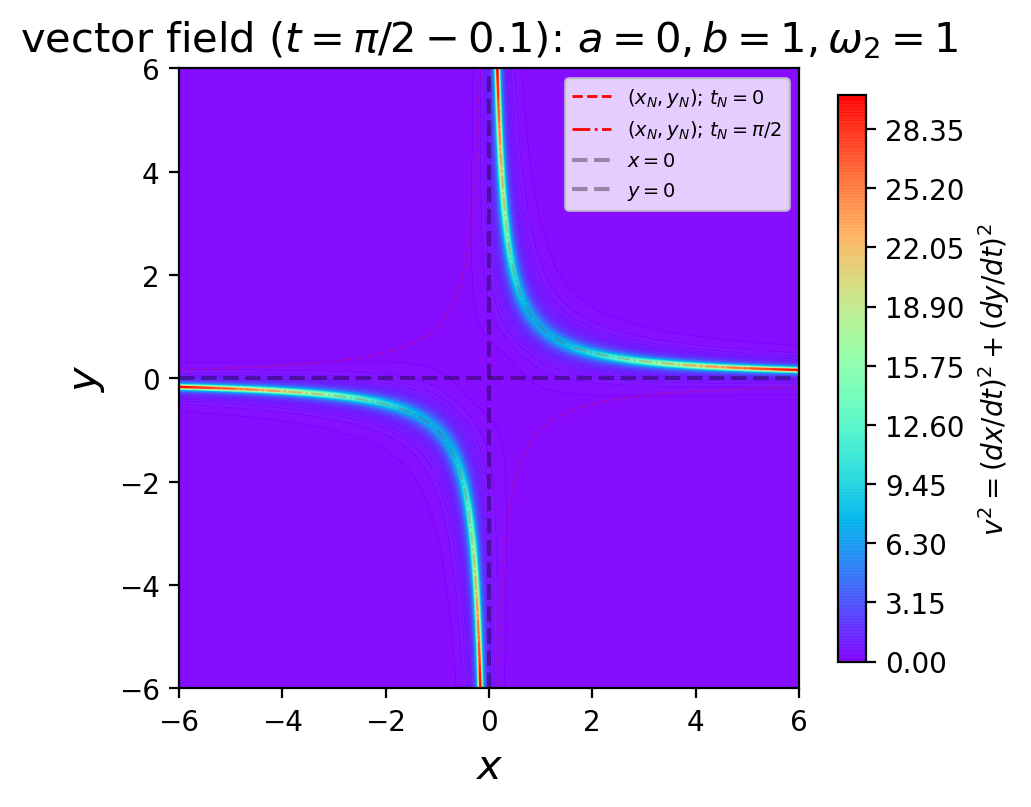

In [316]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

n_levels = 200
cmap = "rainbow"

##############################################
#CONTOUR PLOT
contour1 = ax.contourf(X,Y,np.sqrt(Vx**2 + Vy**2),levels=n_levels,cmap=cmap, alpha=0.95)
cbar = fig.colorbar(contour1, extend='both', shrink=0.75, orientation="vertical", ax=ax)
cbar.set_label("$v^2 = (dx/dt)^2 + (dy/dt)^2$", fontsize=10, rotation=90)

##############################################
# plot nodal lines FIRST
colorN = "red"
k = 0
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.2, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.2, zorder=10)

ax.plot([],[],color="red",linestyle="--",lw=1,label="($x_N, y_N$); $t_N = 0$")

# plot nodal lines SECOND
colorN = "red"
k = 1
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="-.",lw=0.75, alpha=0.2, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="-.",lw=0.75, alpha=0.2, zorder=10)

ax.plot([],[],color="red",linestyle="-.",lw=1,label="($x_N, y_N$); $t_N = \pi/2$")

##############################################
# dashed lines - reference lines
ax.plot((0,0),(-6,6), color="black", label="$x = 0$", linestyle="--", lw=1.5, alpha=0.35)
ax.plot((-6,6),(0,0), color="black", label="$y = 0$", linestyle="--", lw=1.5, alpha=0.35)

##############################################
title = 'vector field ($t = \pi/2 - 0.1$): $a=0, b=1, \omega_2=1$'
ax.set_title(title, fontsize=15)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#axis labels
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)

#legends
ax.legend(loc="best", fontsize=7)

ax.set_aspect(1)
plt.show()

#### Trajectories

In [290]:
a, b, omega2, t0 = [0, 1, 1, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, 0])

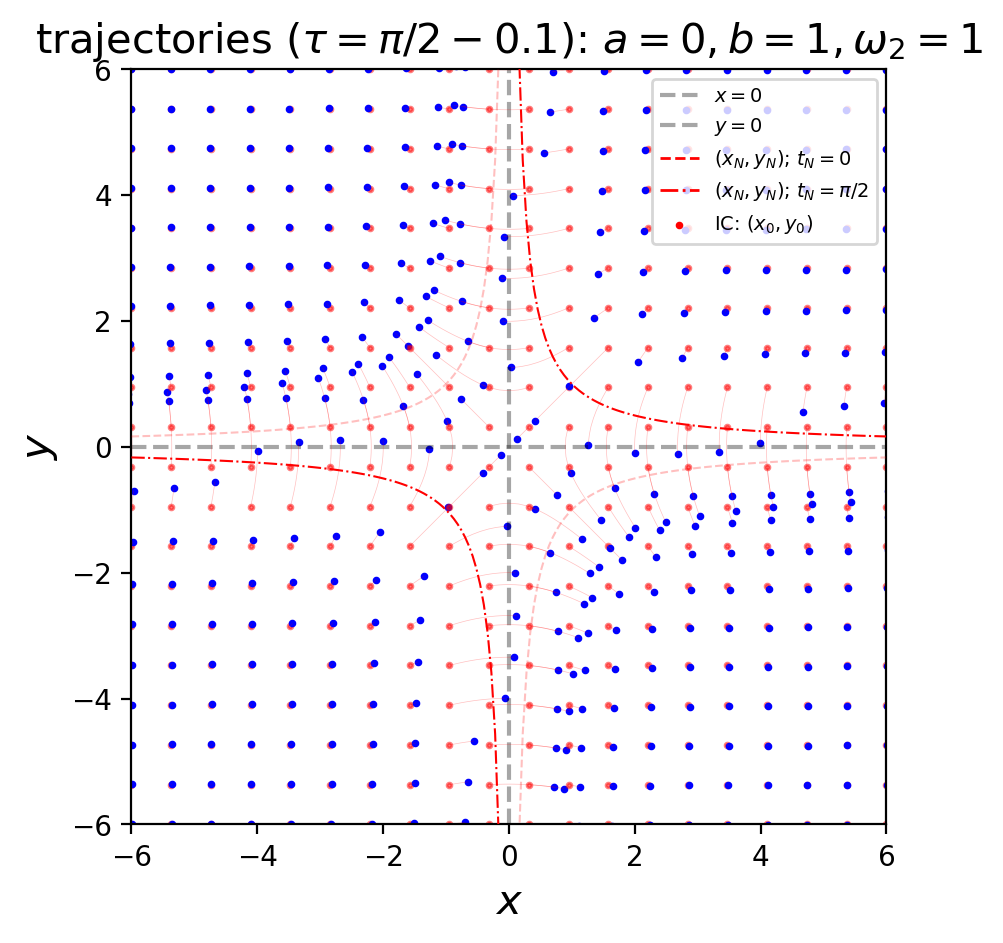

In [321]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

# n_levels = 200
# cmap = "rainbow"

# ##############################################
# #CONTOUR PLOT
# contour1 = ax.contourf(X,Y,np.sqrt(Vx**2 + Vy**2),levels=n_levels,cmap=cmap, alpha=0.95)
# cbar = fig.colorbar(contour1, extend='both', shrink=0.9, orientation="vertical", ax=ax)
# cbar.set_label("$v^2 = (dx/dt)^2 + (dy/dt)^2$", fontsize=15, rotation=90)

# dashed lines - reference lines
xN_color = "black"
ax.plot((0,0),(-6,6), color=xN_color, label="$x = 0$", linestyle="--", lw=1.5, alpha=0.35)
ax.plot((-6,6),(0,0), color=xN_color, label="$y = 0$", linestyle="--", lw=1.5, alpha=0.35)

# ##############################################
# plot nodal lines FIRST
colorN = "red"
k = 0
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.25, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="--",lw=0.75, alpha=0.25, zorder=10)

ax.plot([],[],color="red",linestyle="--",lw=1,label="($x_N, y_N$); $t_N = 0$")

# plot nodal lines SECOND
colorN = "red"
k = 1
tk = k*np.pi/2

# left branch
xN = np.linspace(x_min, -0.1, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="-.",lw=0.75, alpha=1, zorder=10)

# right branch
xN = np.linspace(0.1, x_max, 100)
yN = (-1)**(k + 1) * 1/xN
ax.plot(xN, yN, color=colorN,linestyle="-.",lw=0.75, alpha=1, zorder=10)

ax.plot([],[],color="red",linestyle="-.",lw=1,label="($x_N, y_N$); $t_N = \pi/2$")

# ##############################################
# #vertical time lines
# for k in range(5):
#     ax.plot((k*np.pi, k*np.pi), (-6, 6), color="black", linestyle="--", lw=0.75, alpha=0.75)
#     ax.text(k*np.pi+0.1, -5.5, "t = "+str(k)+"$\pi$", rotation=90)

##############################################
#
# PLOT TRAJECTORIES
#
##############################################
t0, tf = [0, np.pi/2-0.1]
# t0, tf = [0, np.pi/4]
time_span = (t0, tf)
color_traj = 'red'

x_min, x_max = [-6, 6]
y_min, y_max = [-6, 6]
x = np.linspace(x_min, x_max, 20)
y = np.linspace(y_min, y_max, 20)
X,Y = np.meshgrid(x,y)
ICs = np.column_stack([X.flatten(), Y.flatten()])

for ic in ICs:
    ax.scatter(*ic, color=color_traj,s=3,alpha=0.5)
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    ax.plot(trajectory[0], trajectory[1], c=color_traj, lw=0.25, alpha=0.25)
    ax.scatter(trajectory[0][-1], trajectory[1][-1], color="blue",s=3, alpha=1)

ax.scatter([], [], color=color_traj,s=3, label="IC: ($x_0, y_0$)", alpha=1)
    
##############################################
#
# CUSTOMISE APPEARANCE
#
##############################################
title = 'trajectories ($\\tau = \pi/2 - 0.1$): $a=0, b=1, \omega_2=1$'
ax.set_title(title, fontsize=15)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#axis labels
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)

# #legends
ax.legend(loc="best", fontsize=7)
# ##############################################

ax.set_aspect(1)
plt.show()

# Lagrangian descriptor and invariant sets

In [192]:
# Integration parameters
tau = np.pi

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-6, 6]
y_min,y_max = [-6, 6]
Nx, Ny = [600, 600]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-10, 10]

In [193]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
box_boundaries = False

In [194]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

In [195]:
LD = LD_forward+LD_backward
LD_gradient = get_gradient_magnitude(LD)

<IPython.core.display.Javascript object>


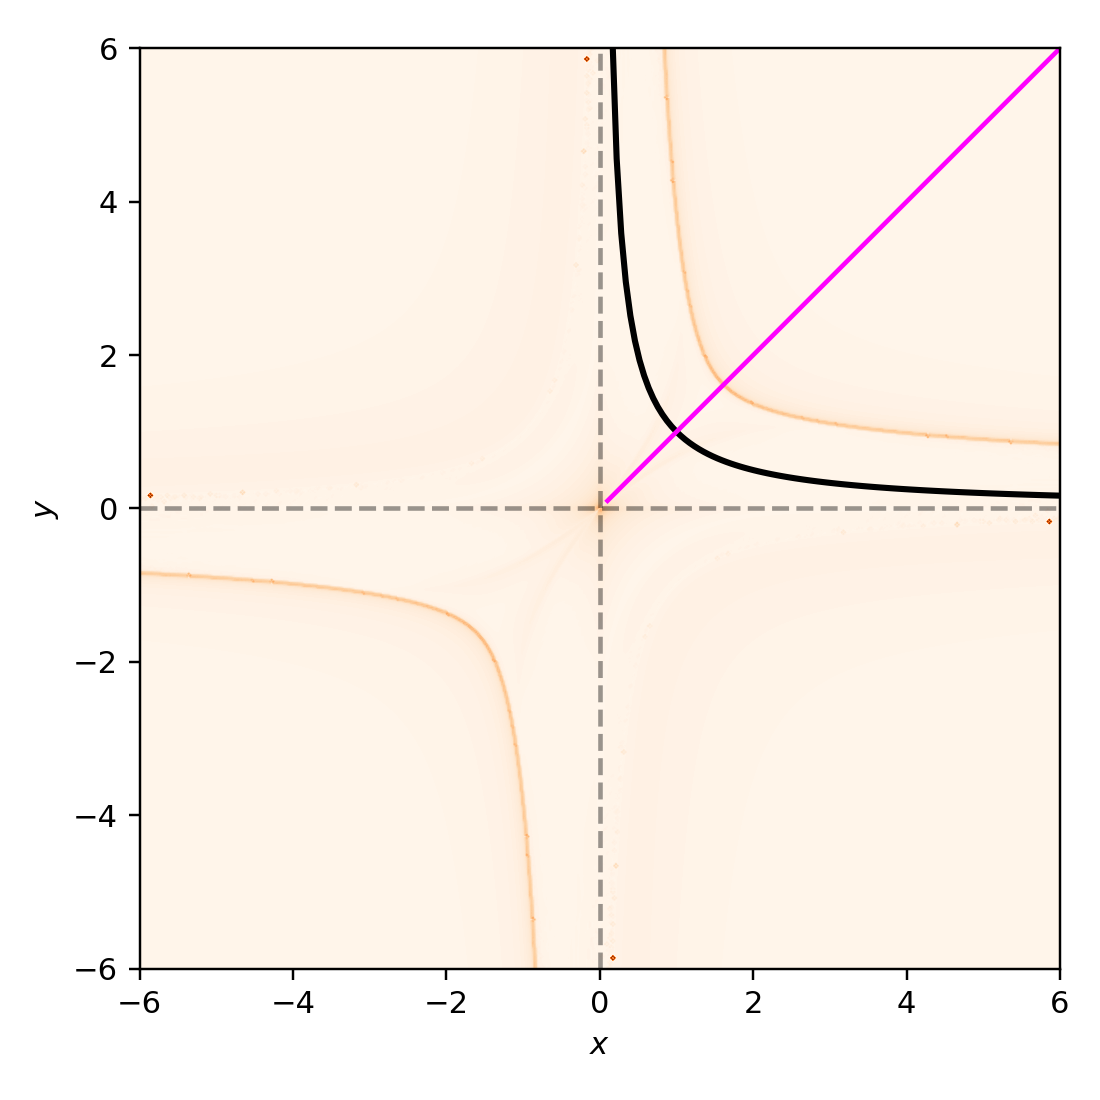

In [212]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)

x_right = np.linspace(0.1, 6, 100)
ax.plot(x_right,  1/x_right,color="black",lw=2)
    
# ax.text(1.25,4,"$t = \\frac{\pi}{2}$",color="black",fontsize=10,zorder=20,
#         bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10})


x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

LD_gradient = get_gradient_magnitude(LD)
ax.contourf(x, y, LD_gradient, cmap="Oranges",levels=100)

x = np.linspace(0.1,6,300); y = x
invariant_curve = np.column_stack([x, y])
ax.plot(*invariant_curve.T,color="magenta")

#reference lines
ax.plot([-6,6],[0,0],color="black",linestyle="--",alpha=0.4)
ax.plot([0,0],[-6,6],color="black",linestyle="--",alpha=0.4)

# ax.text(1.75,1,"IC's: $y_0 - x_0 = 0$",color="magenta")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.set_aspect("equal")
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

fig.tight_layout()


plt.show()

Interpolation 

In [197]:
from scipy.interpolate import RectBivariateSpline

In [198]:
def spline_wrap(v):
    return spline(v[0],v[1]).squeeze()

def fspline(positions):
    surface = np.array(list(map(spline_wrap,positions)))
    return surface

In [199]:
# Mesh parameters
x = np.linspace(x_min,x_max,Nx)
y = np.linspace(y_min,y_max,Ny)

spline = RectBivariateSpline(x,y,LD_gradient)

In [200]:
LD_fspline = fspline

In [201]:
# invariant curve coordinates
x = np.linspace(0,6,300); y = x

invariant_curve = np.column_stack([x, y])

<IPython.core.display.Javascript object>


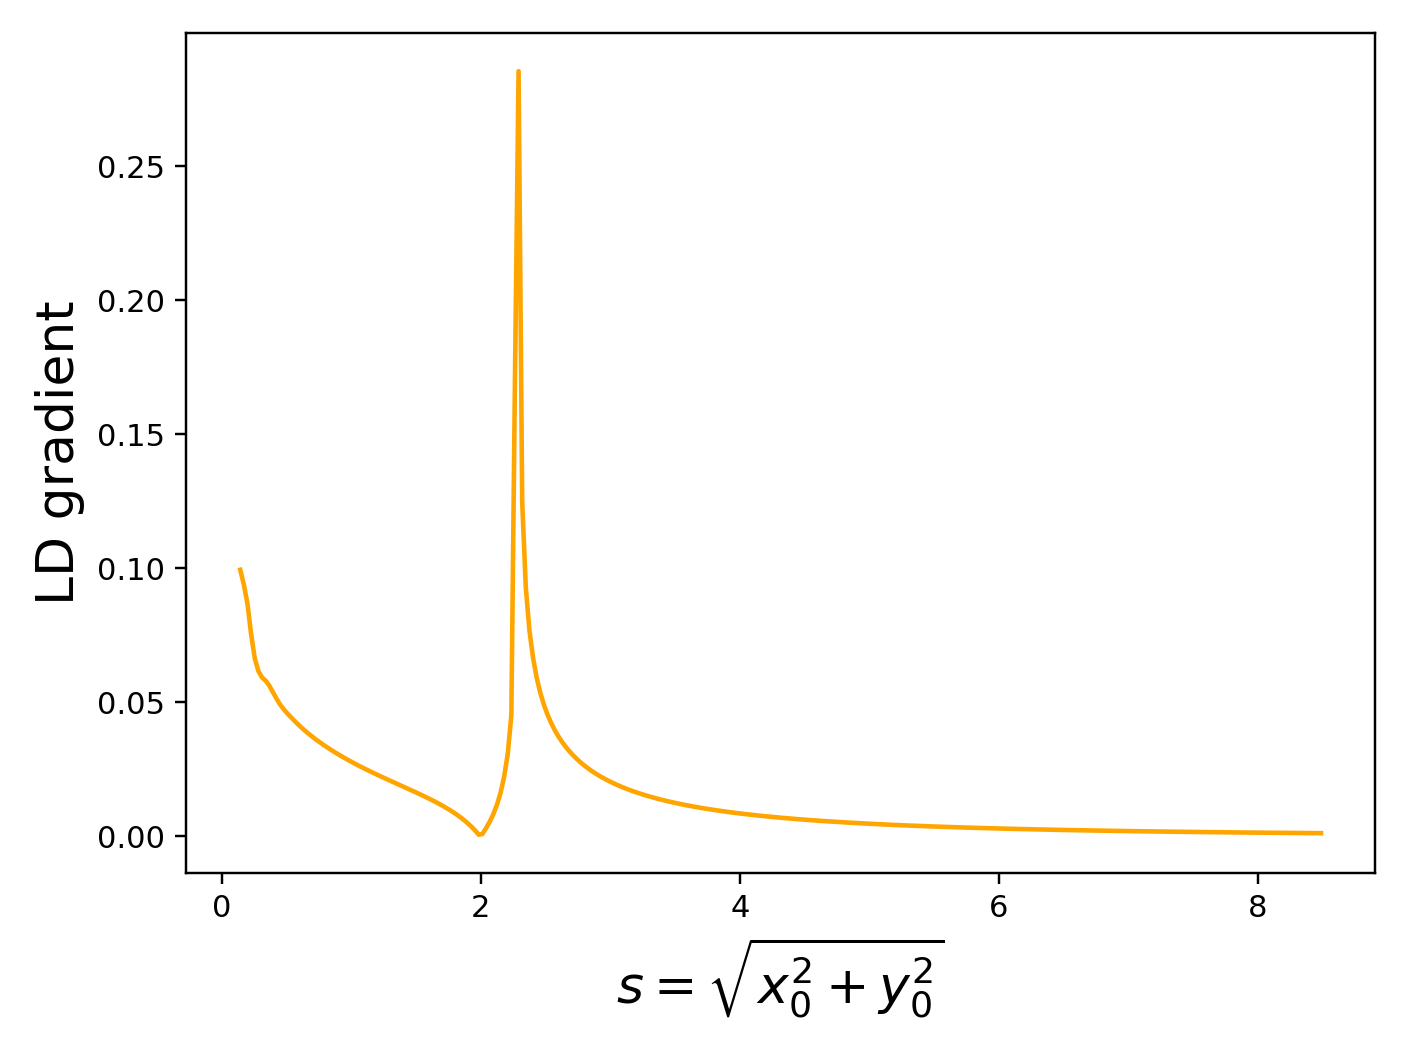

In [213]:
fig = plt.figure(dpi=200)

data = LD_fspline(invariant_curve)

plt.plot(np.linalg.norm(invariant_curve, axis=1), data, color="orange")

plt.xlabel("$s = \sqrt{x_0^2 + y_0^2}$",fontsize=17)
plt.ylabel("LD gradient",fontsize=17)

fig.tight_layout()
plt.show()

In [ ]:
x, y = coords
v_t_eval_x = v_interp_t(t).T[0].reshape(len(x), len(y))
v_t_eval_y = v_interp_t(t).T[1].reshape(len(x), len(y))

#interpolate above data in space
v_x = interp2d(x, y, v_t_eval_x, kind='cubic')
v_y = interp2d(x, y, v_t_eval_y, kind='cubic')

<IPython.core.display.Javascript object>


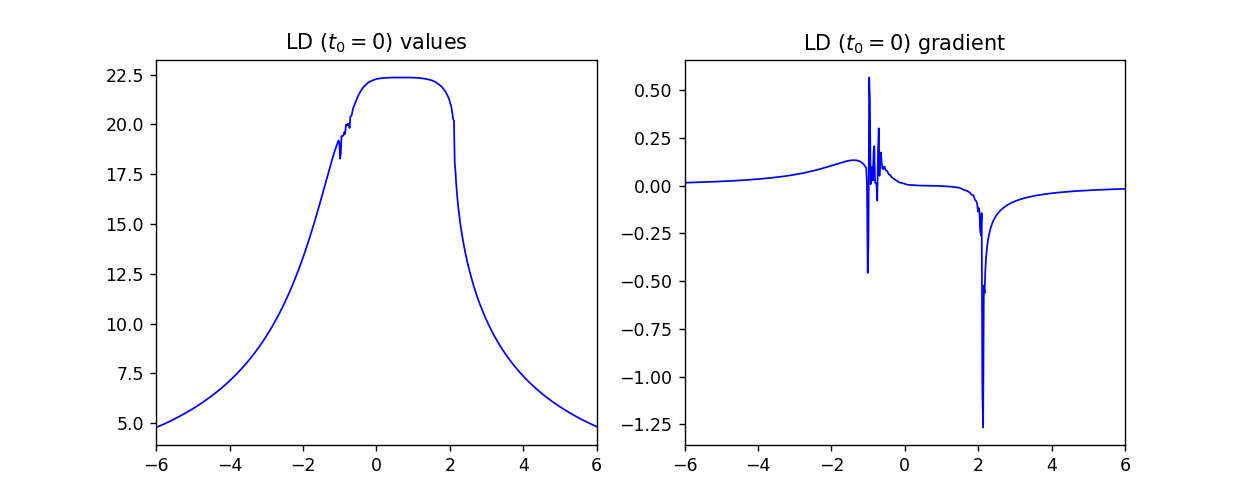

In [542]:
fig,ax = plt.subplots(1,2,figsize=(10,4),dpi=100)

x_axis = np.linspace(x_min, x_max, Nx)
LD_segment = LD.data[100]
LD_segment_gradient = np.gradient(LD_segment)

color = "blue"
lw =1

ax[0].plot(x_axis, LD_segment, color=color, lw=lw)
ax[0].set_xlim(-6,6)
ax[0].set_title("LD ($t_0 = 0$) values")

ax[1].plot(x_axis, LD_segment_gradient, color=color, lw=lw)
ax[1].set_xlim(-6,6)
ax[1].set_title("LD ($t_0 = 0$) gradient")

# dashed lines - nodal points
# xN_color = "magenta"
# xN_lw = 1
# y0_lims = ax[0].get_ylim()
# y1_lims = ax[1].get_ylim()
# ax[0].plot((-1, -1), y0_lims, color=xN_color, label="$x_{nodal} = -1$", linestyle="--", lw=xN_lw, alpha=0.75)
# ax[1].plot((-1, -1), y1_lims, color=xN_color, label="$x_{nodal} = -1$", linestyle="--", lw=xN_lw, alpha=0.75)

# ax[0].set_ylim(*y0_lims)
# ax[1].set_ylim(*y1_lims)

# ax[0].legend(loc="best")
# ax[1].legend(loc="best")

plt.show()

# 3D plots

In [31]:
%matplotlib notebook

In [32]:
def print_t_label(k, T_string):
    if k == 0:
        return "0"
    elif k == 1:
        return T_string
    else:
        return str(k)+T_string

In [33]:
a, b, omega2, t0 = [0, 1, 1, 0]
vector_field = lambda t, u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2, 0])

<IPython.core.display.Javascript object>


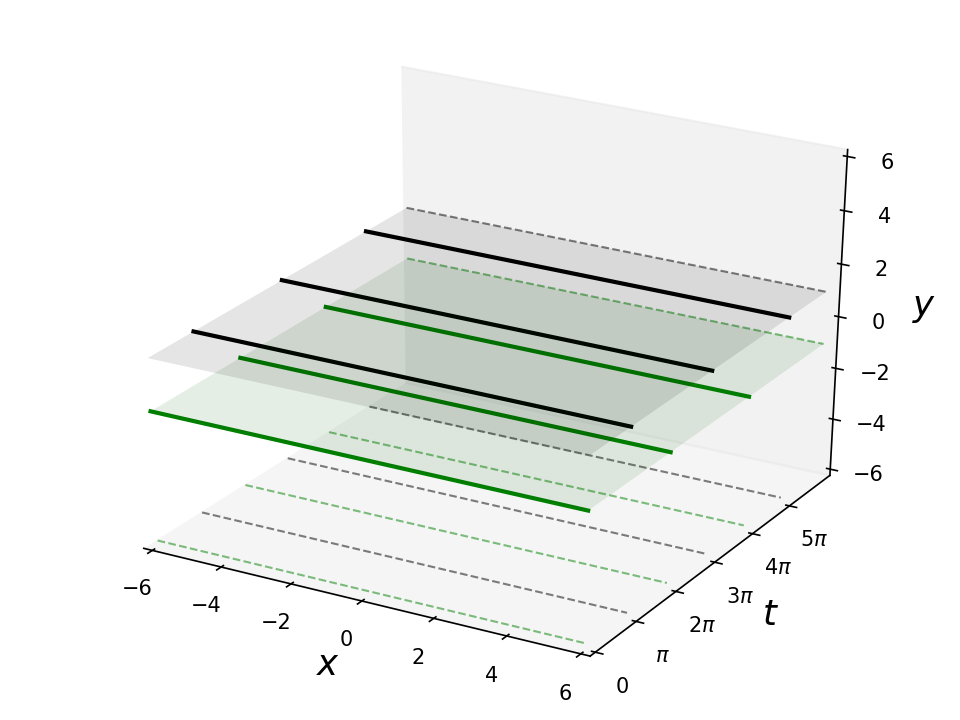

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')

##############################################
#
# PLOT NODAL LINES
#
##############################################
N_nodal = 100
for k in range(6):
    tN = k*np.ones(N_nodal)*np.pi
    #nodal lines coordinates
    xN = np.linspace(-6, 6, N_nodal)
    yN = (-1)**(k+1)*np.ones(len(xN))
    #plot nodal lines 
    if k%2==0:
        colorN = "green"
    else: 
        colorN = "black"
    ax.plot(xN, tN, yN, color=colorN,lw=2, linestyle="-")
    #bottom reference lines
    ax.plot(xN, tN, -6*np.ones(N_nodal), color=colorN, lw=1, linestyle="--", alpha=0.5)

offset = 0.1
ax.plot(xN,(6*np.pi)*np.ones(N_nodal), 1*np.ones(N_nodal), color="black", lw=1, linestyle="--", alpha=0.5)
ax.plot(xN,(6*np.pi)*np.ones(N_nodal), -1*np.ones(N_nodal), color="green", lw=1, linestyle="--", alpha=0.5)

#plot plane
xs = np.linspace(-6, 6, 200)
ts = np.linspace(0, 6*np.pi, 200)
X, T = np.meshgrid(xs, ts)
ax.plot_surface(X, T, 0*X+1,color="black",alpha=0.1)
ax.plot_surface(X, T, 0*X-1,color="green",alpha=0.1)
##############################################
#
# PLOT TRAJECTORIES
#
##############################################
# t0, tf = [0, 6*np.pi]
# time_span = (t0, tf)
# color_traj = 'blue'

# x_min, x_max = [-6, 6]
# y_min, y_max = [-6, 6]
# x = np.linspace(x_min, x_max, 10)
# y = np.linspace(y_min, y_max, 10)
# X,Y = np.meshgrid(x,y)
# ICs = np.column_stack([X.flatten(), Y.flatten()])

# for ic in ICs:
# #     ax.scatter(*ic, color=color_traj,s=3,alpha=0.5)
#     solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
#     trajectory = solution.y
#     n = len(trajectory[0])
#     ax.plot(trajectory[0], np.linspace(*time_span,n), trajectory[1], c=color_traj, lw=0.5, alpha=0.75)
    
#     ax.scatter(trajectory[0][-1], trajectory[1][-1], color="blue",s=3, alpha=1)

# ax.scatter([], [], color=color_traj,s=3, label="IC: ($x_0, y_0$)", alpha=1)
##############################################
#Set time axis labels
ax.set_yticks(list(np.pi*np.arange(0,6)))
ax.set_yticklabels([print_t_label(k, "$\pi$") for k in range(6)])

ax.set_xlabel("$x$", fontsize=17)
ax.set_ylabel("$t$", fontsize=17)
ax.set_zlabel("$y$", fontsize=17)

ax.set_xlim(-6, 6)
ax.set_ylim(0, 6*np.pi)
ax.set_zlim(-6, 6)
ax.grid(False)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

fig.tight_layout()

plt.show()

# Interaction of trajectories and nodal lines

## 3D plot

<IPython.core.display.Javascript object>


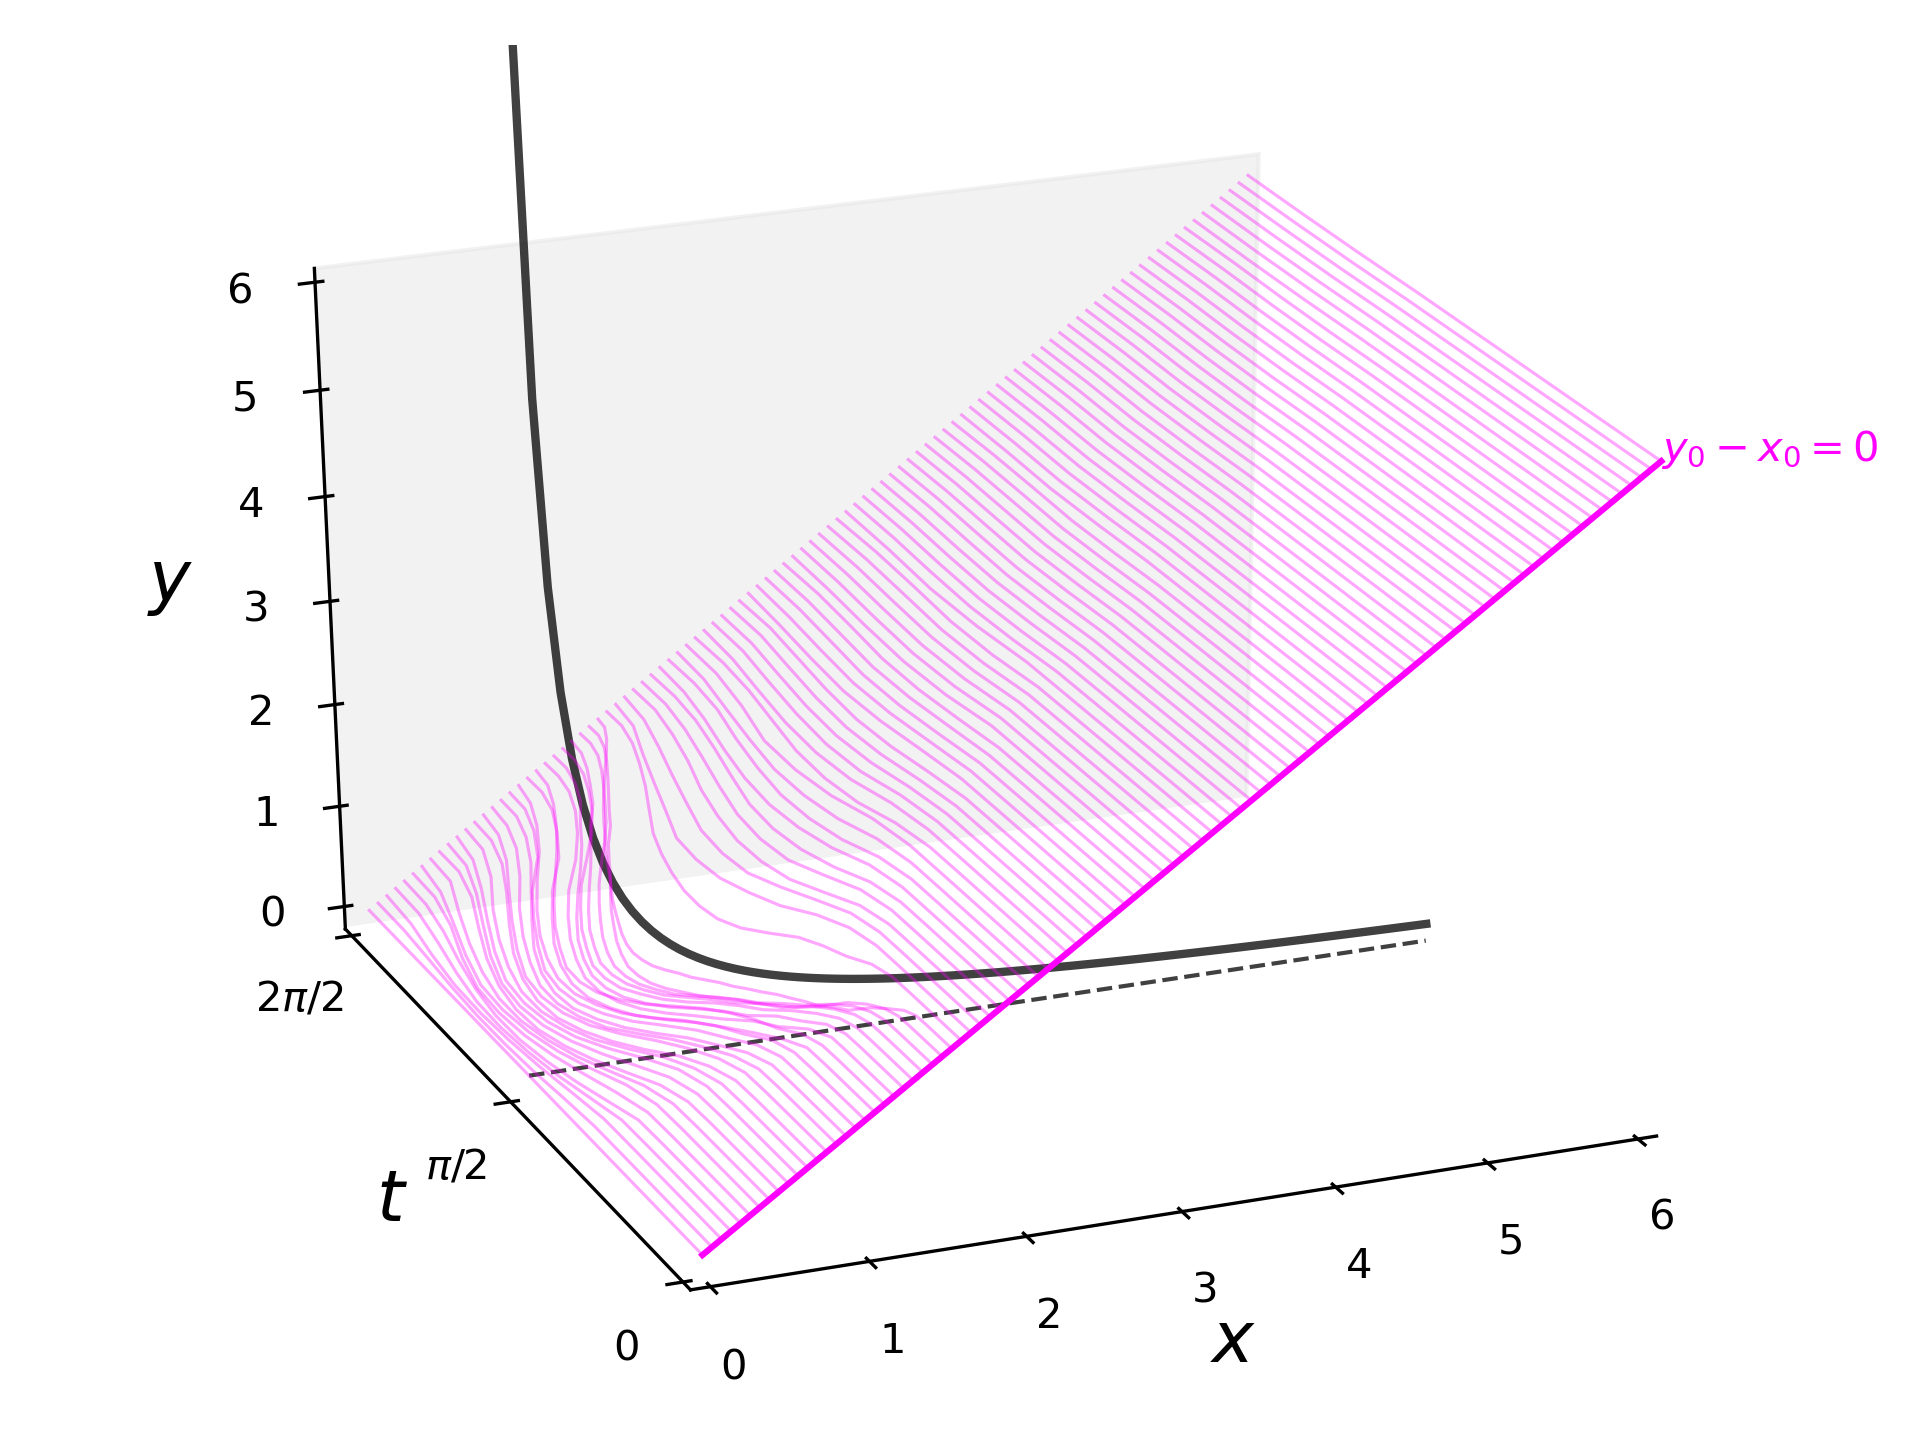

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

Periods = 2
##############################################
#
# PLOT NODAL LINES
#
##############################################
N_nodal = 100
for k in range(Periods+1):
    tN = k*np.ones(N_nodal)*np.pi/2
    if k%2==0:
        colorN = "green"
        alphaN = 0
    else: 
        colorN = "black"
        alphaN = 0.75
    #nodal lines coordinates: left branch
#     xN_left = np.linspace(-6, -0.1, N_nodal)
#     yN_left = (-1)**(k+1)/xN_left
#     ax.plot(xN_left, tN, yN_left, color=colorN,lw=2,linestyle="-",alpha=0.1)

    #nodal lines coordinates: right branch
    xN_right = np.linspace(0.1, 6, N_nodal)
    yN_right = (-1)**(k+1)/xN_right
    ax.plot(xN_right, tN, yN_right, color=colorN,lw=2,linestyle="-",alpha=alphaN)
    
    #bottom reference lines
#     x = np.linspace(-6,6,N_nodal)
    x = np.linspace(0,6,N_nodal)
    ax.plot(x, tN, 0*np.ones(N_nodal),color=colorN,lw=1,linestyle="--",alpha=alphaN)

# ax.plot(xN_left,((Periods+1)*np.pi/2)*np.ones(N_nodal),1/xN_left, color="black", lw=1, linestyle="--", alpha=0.2)
# ax.plot(xN_right,((Periods+1)*np.pi/2)*np.ones(N_nodal),1/xN_right, color="black", lw=1, linestyle="--", alpha=0.75)

# ax.plot(xN_left,((Periods+1)*np.pi/2)*np.ones(N_nodal),-1/xN_left, color="green", lw=1, linestyle="--", alpha=0.2)
# ax.plot(xN_right,((Periods+1)*np.pi/2)*np.ones(N_nodal),-1/xN_right, color="green", lw=1, linestyle="--", alpha=0.5)

# ax.plot(xN_right,(6*np.pi/2)*np.ones(N_nodal), -1*np.ones(N_nodal), color="green", lw=1, linestyle="--", alpha=0.5)
    
#plot plane
# ts = np.linspace(0, 3*np.pi, 200)

# # xs = np.linspace(-6, -0.1, 200)
# # X, T = np.meshgrid(xs, ts)
# # ax.plot_surface(X, T, -1/X ,color="black",alpha=0.1)

# xs = np.linspace(6, 0.1, 200)
# X, T = np.meshgrid(xs, ts)
# ax.plot_surface(X, T, 1/X ,color="black",alpha=0.1)

# ax.plot_surface(X, T, -1/X,color="green",alpha=0.1)
##############################################
#
# PLOT TRAJECTORIES
#
##############################################
t0, tf = [0, Periods*np.pi/2]
time_span = (t0, tf)
color_traj = 'magenta'

# x_min, x_max = [-6, 6]
# y_min, y_max = [-6, 6]
# x = np.linspace(x_min, x_max, 10)
# y = np.linspace(y_min, y_max, 10)
# X,Y = np.meshgrid(x,y)
# ICs = np.column_stack([X.flatten(), Y.flatten()])

# for ic in ICs:
# #     ax.scatter(*ic, color=color_traj,s=3,alpha=0.5)
#     solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
#     trajectory = solution.y
#     n = len(trajectory[0])
#     ax.plot(trajectory[0], np.linspace(*time_span,n), trajectory[1], c=color_traj, lw=0.5, alpha=0.75)
    
#     ax.scatter(trajectory[0][-1], trajectory[1][-1], color="blue",s=3, alpha=1)

# ax.scatter([], [], color=color_traj,s=3, label="IC: ($x_0, y_0$)", alpha=1)

for h in np.linspace(0,6,100):
    ic = h*np.array([1,1])
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    line = ax.plot(trajectory[0], np.linspace(*time_span,n), trajectory[1], c=color_traj, lw=0.75, alpha=0.35)


#plot plane of ICs
ts = np.linspace(0, Periods*np.pi/2, 200)
xs = np.linspace(0,6,200)
# X, T = np.meshgrid(xs, ts)
# ax.plot_surface(X, T, X ,color="blue",alpha=0.05,zorder=20)

#plot plane of ICs wit nodal lines
# for k in range(Periods-1):
#     ax.scatter(1,(2*k+1)*np.pi/2,1,color="red",s=10,zorder=40)

# line of ICs    
ax.plot(xs, np.zeros(len(xs)), xs, color="magenta")
ax.text(6, 0, 6, "$y_0 - x_0 = 0$", color="magenta")
    
# intesection of plane of nodal lines with plane of ICs
# ax.plot(np.ones(len(ts)),ts, np.ones(len(ts)), color="red",linestyle="--",lw=1,alpha=1)
# ax.text(1.5,0,1,"$x_0 = y_0 = 1$", color="red")
##############################################
ax.set_yticks(list((np.pi/2)*np.arange(7)))
ax.set_yticklabels([print_t_label(k, "$\pi/2$") for k in range(7)])

ax.set_xlabel("$x$", fontsize=17)
ax.set_ylabel("$t$", fontsize=17)
ax.set_zlabel("$y$", fontsize=17)

ax.set_xlim(0, 6)
ax.set_ylim(0, Periods*np.pi/2)
ax.set_zlim(-0.1, 6)
ax.grid(False)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

fig.tight_layout()

plt.show()

## Planar projection

In [214]:
e1 = np.array([1,1])/np.sqrt(2)

<IPython.core.display.Javascript object>


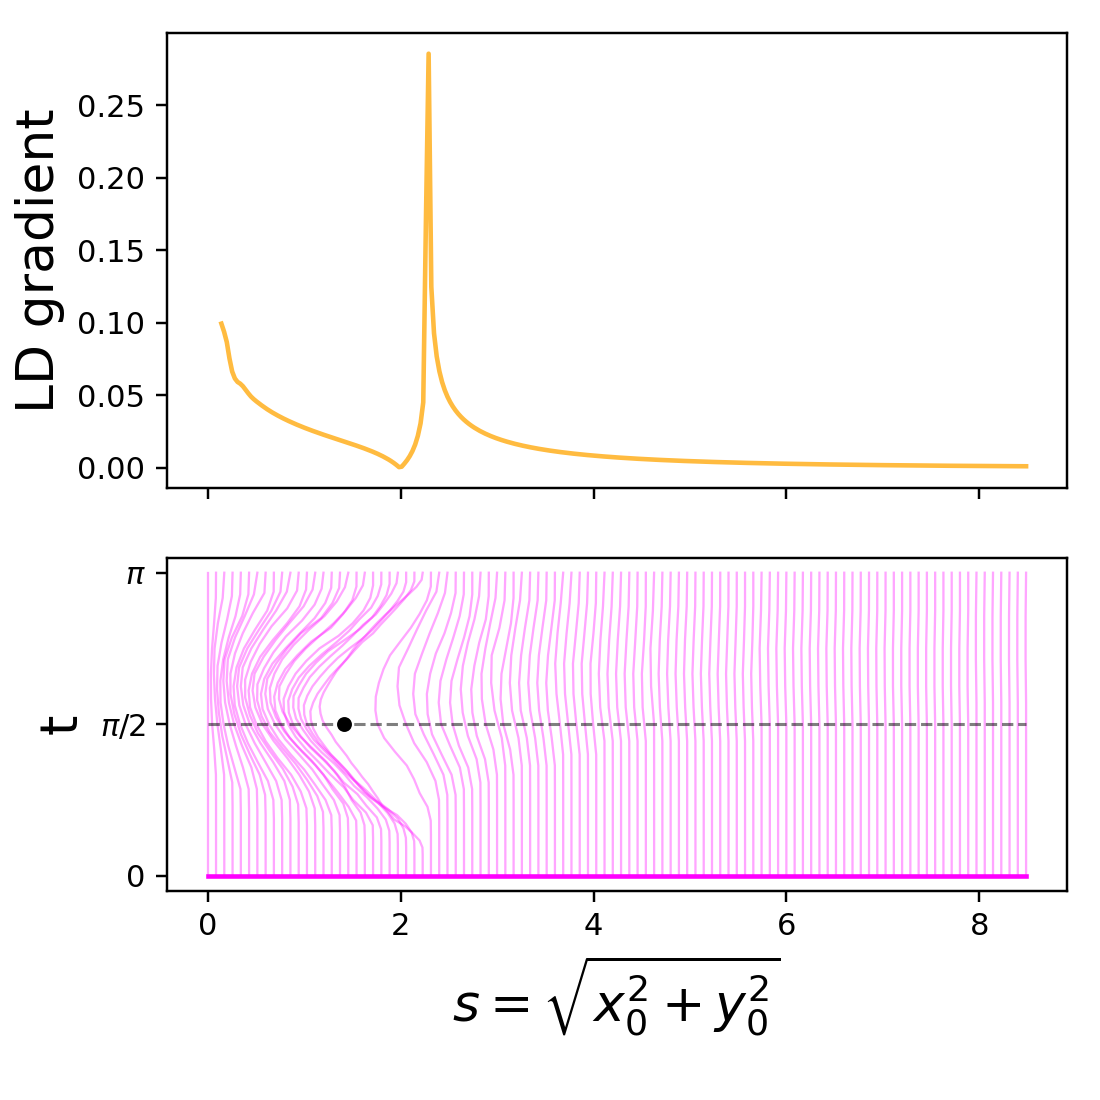

In [228]:
fig,(ax2,ax1) = plt.subplots(2,1,figsize=(5,5),dpi=200,sharex=True)


color_traj = "magenta"

for h in np.linspace(0,6,100):
    ic = h*np.array([1,1])
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    traj_projected = [np.dot(e1, trajectory.T[i]) for i in range(len(trajectory.T))]
    ax1.plot(traj_projected, np.linspace(*time_span,n), c=color_traj, lw=0.75, alpha=0.35)

ax1.set_yticks([0, np.pi/2, np.pi])
ax1.set_yticklabels(["0", "$\pi/2$", "$\pi$"])

ax1.set_ylabel("t",fontsize=17)
ax1.set_xlabel("$s = \sqrt{x_0^2 + y_0^2}$",fontsize=17)

ax1.plot([0,np.sqrt(2*6**2)],[0,0],color="magenta")

nodal_line_inv_set_intersection = np.dot(e1, np.array([1,1]))

ax1.scatter(nodal_line_inv_set_intersection,np.pi/2, color="black",s=15)

#reference line
ax1.plot([0,np.sqrt(2*6**2)],[np.pi/2, np.pi/2],color="black",linestyle="--",lw=1,alpha=0.5)

ax1.set_aspect("equal")


ax2.plot(np.linalg.norm(invariant_curve, axis=1), data, color="orange",alpha=0.75)
ax2.set_ylabel("LD gradient",fontsize=17)

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


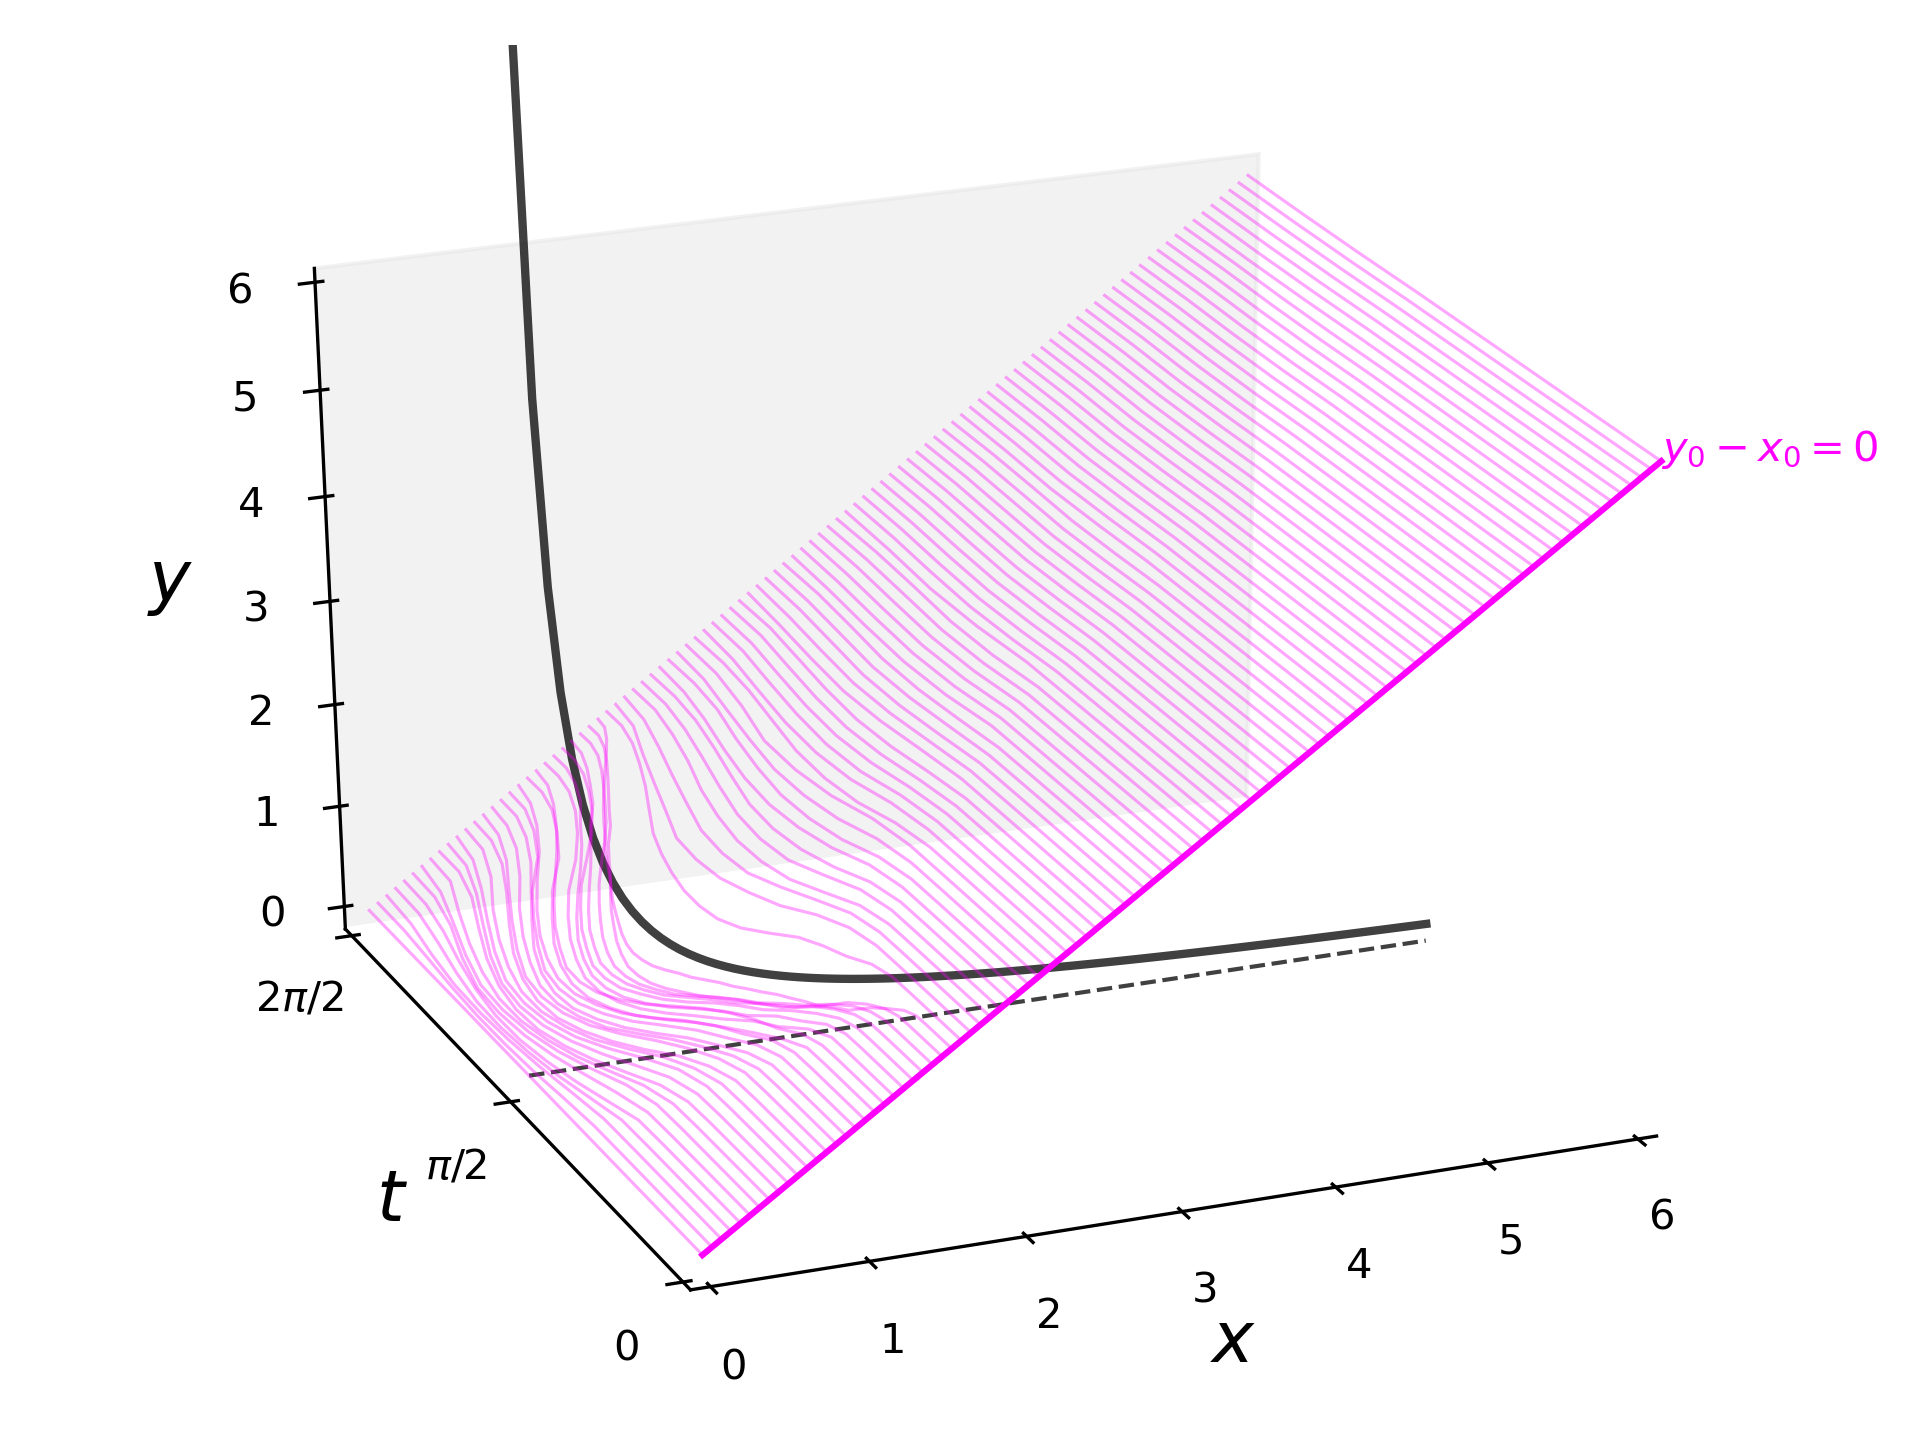

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

Periods = 2
##############################################
#
# PLOT NODAL LINES
#
##############################################
N_nodal = 100
for k in range(Periods+1):
    tN = k*np.ones(N_nodal)*np.pi/2
    if k%2==0:
        colorN = "green"
        alphaN = 0
    else: 
        colorN = "black"
        alphaN = 0.75
    #nodal lines coordinates: left branch
#     xN_left = np.linspace(-6, -0.1, N_nodal)
#     yN_left = (-1)**(k+1)/xN_left
#     ax.plot(xN_left, tN, yN_left, color=colorN,lw=2,linestyle="-",alpha=0.1)

    #nodal lines coordinates: right branch
    xN_right = np.linspace(0.1, 6, N_nodal)
    yN_right = (-1)**(k+1)/xN_right
    ax.plot(xN_right, tN, yN_right, color=colorN,lw=2,linestyle="-",alpha=alphaN)
    
    #bottom reference lines
#     x = np.linspace(-6,6,N_nodal)
    x = np.linspace(0,6,N_nodal)
    ax.plot(x, tN, 0*np.ones(N_nodal),color=colorN,lw=1,linestyle="--",alpha=alphaN)

# ax.plot(xN_left,((Periods+1)*np.pi/2)*np.ones(N_nodal),1/xN_left, color="black", lw=1, linestyle="--", alpha=0.2)
# ax.plot(xN_right,((Periods+1)*np.pi/2)*np.ones(N_nodal),1/xN_right, color="black", lw=1, linestyle="--", alpha=0.75)

# ax.plot(xN_left,((Periods+1)*np.pi/2)*np.ones(N_nodal),-1/xN_left, color="green", lw=1, linestyle="--", alpha=0.2)
# ax.plot(xN_right,((Periods+1)*np.pi/2)*np.ones(N_nodal),-1/xN_right, color="green", lw=1, linestyle="--", alpha=0.5)

# ax.plot(xN_right,(6*np.pi/2)*np.ones(N_nodal), -1*np.ones(N_nodal), color="green", lw=1, linestyle="--", alpha=0.5)
    
#plot plane
# ts = np.linspace(0, 3*np.pi, 200)

# # xs = np.linspace(-6, -0.1, 200)
# # X, T = np.meshgrid(xs, ts)
# # ax.plot_surface(X, T, -1/X ,color="black",alpha=0.1)

# xs = np.linspace(6, 0.1, 200)
# X, T = np.meshgrid(xs, ts)
# ax.plot_surface(X, T, 1/X ,color="black",alpha=0.1)

# ax.plot_surface(X, T, -1/X,color="green",alpha=0.1)
##############################################
#
# PLOT TRAJECTORIES
#
##############################################
t0, tf = [0, Periods*np.pi/2]
time_span = (t0, tf)
color_traj = 'magenta'

for h in np.linspace(0,6,100):
    ic = h*np.array([1,1])
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    line = ax.plot(trajectory[0], np.linspace(*time_span,n), trajectory[1], c=color_traj, lw=0.75, alpha=0.35)


#plot plane of ICs
ts = np.linspace(0, Periods*np.pi/2, 200)
xs = np.linspace(0,6,200)
# X, T = np.meshgrid(xs, ts)
# ax.plot_surface(X, T, X ,color="blue",alpha=0.05,zorder=20)

#plot plane of ICs wit nodal lines
# for k in range(Periods-1):
#     ax.scatter(1,(2*k+1)*np.pi/2,1,color="red",s=10,zorder=40)

# line of ICs    
ax.plot(xs, np.zeros(len(xs)), xs, color="magenta")
ax.text(6, 0, 6, "$y_0 - x_0 = 0$", color="magenta")
    
# intesection of plane of nodal lines with plane of ICs
# ax.plot(np.ones(len(ts)),ts, np.ones(len(ts)), color="red",linestyle="--",lw=1,alpha=1)
# ax.text(1.5,0,1,"$x_0 = y_0 = 1$", color="red")
##############################################
ax.set_yticks(list((np.pi/2)*np.arange(7)))
ax.set_yticklabels([print_t_label(k, "$\pi/2$") for k in range(7)])

ax.set_xlabel("$x$", fontsize=17)
ax.set_ylabel("$t$", fontsize=17)
ax.set_zlabel("$y$", fontsize=17)

ax.set_xlim(0, 6)
ax.set_ylim(0, Periods*np.pi/2)
ax.set_zlim(-0.1, 6)
ax.grid(False)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

fig.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


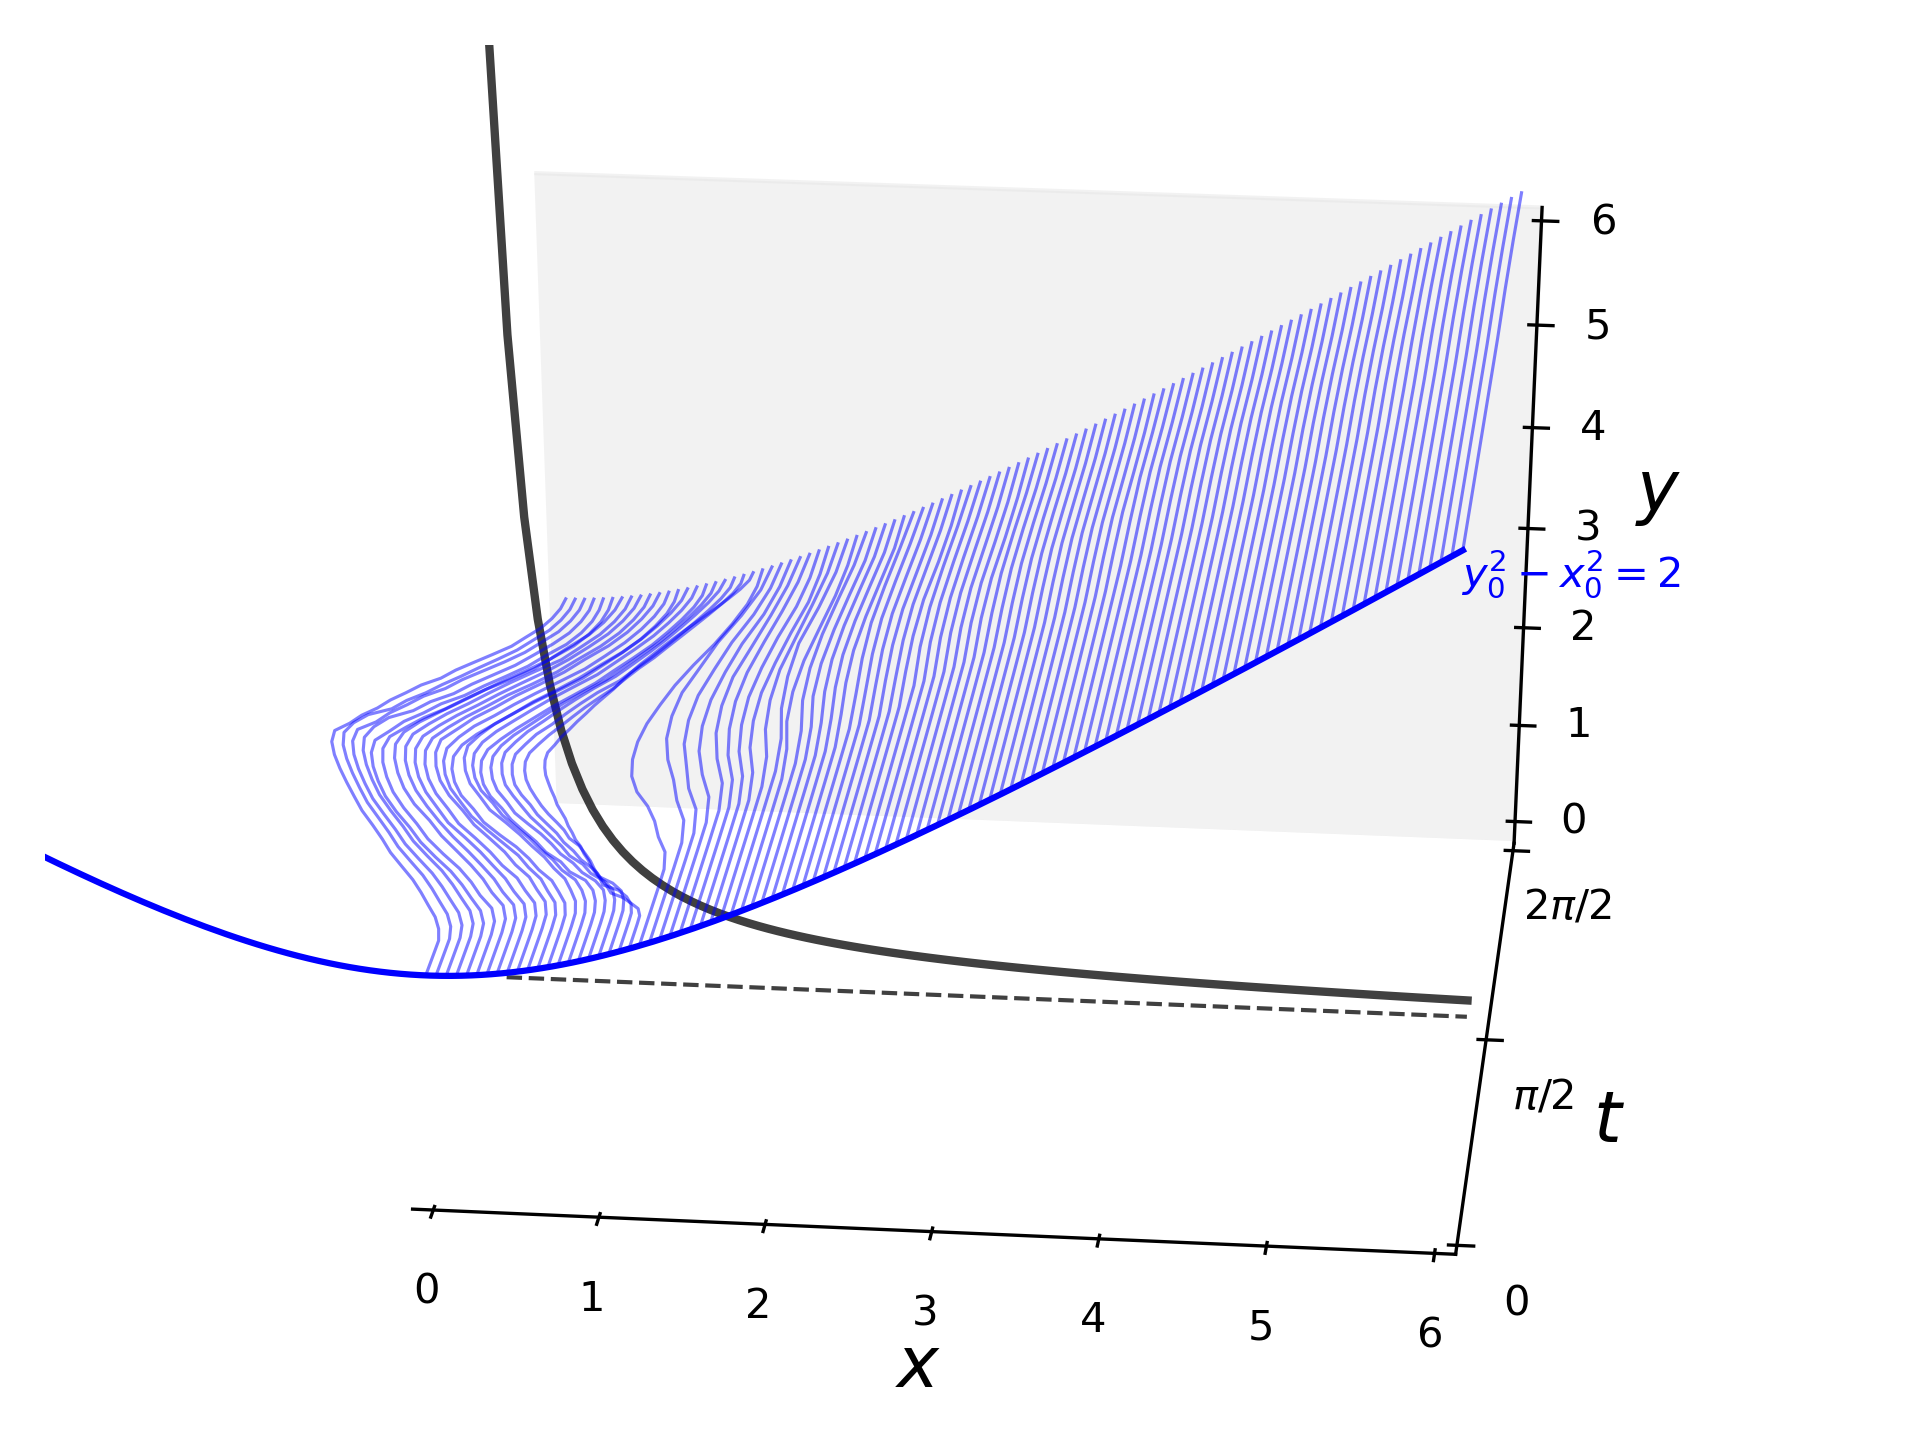

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

Periods = 2
##############################################
#
# PLOT NODAL LINES
#
##############################################
N_nodal = 100
for k in range(Periods+1):
    tN = k*np.ones(N_nodal)*np.pi/2
    if k%2==0:
        colorN = "green"
        alphaN = 0
    else: 
        colorN = "black"
        alphaN = 0.75
    #nodal lines coordinates: left branch
#     xN_left = np.linspace(-6, -0.1, N_nodal)
#     yN_left = (-1)**(k+1)/xN_left
#     ax.plot(xN_left, tN, yN_left, color=colorN,lw=2,linestyle="-",alpha=0.1)

    #nodal lines coordinates: right branch
    xN_right = np.linspace(0.1, 6, N_nodal)
    yN_right = (-1)**(k+1)/xN_right
    ax.plot(xN_right, tN, yN_right, color=colorN,lw=2,linestyle="-",alpha=alphaN)
    
    #bottom reference lines
#     x = np.linspace(-6,6,N_nodal)
    x = np.linspace(0,6,N_nodal)
    ax.plot(x, tN, 0*np.ones(N_nodal),color=colorN,lw=1,linestyle="--",alpha=alphaN)

# ax.plot(xN_left,((Periods+1)*np.pi/2)*np.ones(N_nodal),1/xN_left, color="black", lw=1, linestyle="--", alpha=0.2)
# ax.plot(xN_right,((Periods+1)*np.pi/2)*np.ones(N_nodal),1/xN_right, color="black", lw=1, linestyle="--", alpha=0.75)

# ax.plot(xN_left,((Periods+1)*np.pi/2)*np.ones(N_nodal),-1/xN_left, color="green", lw=1, linestyle="--", alpha=0.2)
# ax.plot(xN_right,((Periods+1)*np.pi/2)*np.ones(N_nodal),-1/xN_right, color="green", lw=1, linestyle="--", alpha=0.5)

# ax.plot(xN_right,(6*np.pi/2)*np.ones(N_nodal), -1*np.ones(N_nodal), color="green", lw=1, linestyle="--", alpha=0.5)
    
#plot plane
# ts = np.linspace(0, 3*np.pi, 200)

# # xs = np.linspace(-6, -0.1, 200)
# # X, T = np.meshgrid(xs, ts)
# # ax.plot_surface(X, T, -1/X ,color="black",alpha=0.1)

# xs = np.linspace(6, 0.1, 200)
# X, T = np.meshgrid(xs, ts)
# ax.plot_surface(X, T, 1/X ,color="black",alpha=0.1)

# ax.plot_surface(X, T, -1/X,color="green",alpha=0.1)
##############################################
#
# PLOT TRAJECTORIES
#
##############################################
t0, tf = [0, Periods*np.pi/2]
time_span = (t0, tf)
color_traj = 'blue'

# x_min, x_max = [-6, 6]
# y_min, y_max = [-6, 6]
# x = np.linspace(x_min, x_max, 10)
# y = np.linspace(y_min, y_max, 10)
# X,Y = np.meshgrid(x,y)
# ICs = np.column_stack([X.flatten(), Y.flatten()])

# for ic in ICs:
# #     ax.scatter(*ic, color=color_traj,s=3,alpha=0.5)
#     solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
#     trajectory = solution.y
#     n = len(trajectory[0])
#     ax.plot(trajectory[0], np.linspace(*time_span,n), trajectory[1], c=color_traj, lw=0.5, alpha=0.75)
    
#     ax.scatter(trajectory[0][-1], trajectory[1][-1], color="blue",s=3, alpha=1)

# ax.scatter([], [], color=color_traj,s=3, label="IC: ($x_0, y_0$)", alpha=1)

Q = 2
for h in np.linspace(0,6,100):
    ic = np.array([h, np.sqrt(Q**2 + h**2)])
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    line = ax.plot(trajectory[0], np.linspace(*time_span,n), trajectory[1], c=color_traj, lw=0.75, alpha=0.5)


#plot plane of ICs
ts = np.linspace(0, Periods*np.pi/2, 200)
# xs = np.linspace(0,6,200)
# X, T = np.meshgrid(xs, ts)
# ax.plot_surface(X, T, X ,color="blue",alpha=0.05,zorder=20)

#plot plane of ICs wit nodal lines
# for k in range(Periods-1):
#     ax.scatter(1,(2*k+1)*np.pi/2,1,color="red",s=10,zorder=40)

# line of ICs    
ax.plot(xs, np.zeros(len(xs)), np.sqrt(Q**2 + xs**2), color="blue")
ax.text(6, 0, 6, "$y_0^2 - x_0^2 = 2$", color="blue")
    
# intesection of plane of nodal lines with plane of ICs
# ax.plot(np.ones(len(ts)),ts, np.ones(len(ts)), color="red",linestyle="--",lw=1,alpha=1)
# ax.text(1.5,0,1,"$x_0 = y_0 = 1$", color="red")
##############################################
ax.set_yticks(list((np.pi/2)*np.arange(7)))
ax.set_yticklabels([print_t_label(k, "$\pi/2$") for k in range(7)])

ax.set_xlabel("$x$", fontsize=17)
ax.set_ylabel("$t$", fontsize=17)
ax.set_zlabel("$y$", fontsize=17)

ax.set_xlim(0, 6)
ax.set_ylim(0, Periods*np.pi/2)
ax.set_zlim(-0.1, 6)
ax.grid(False)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

fig.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


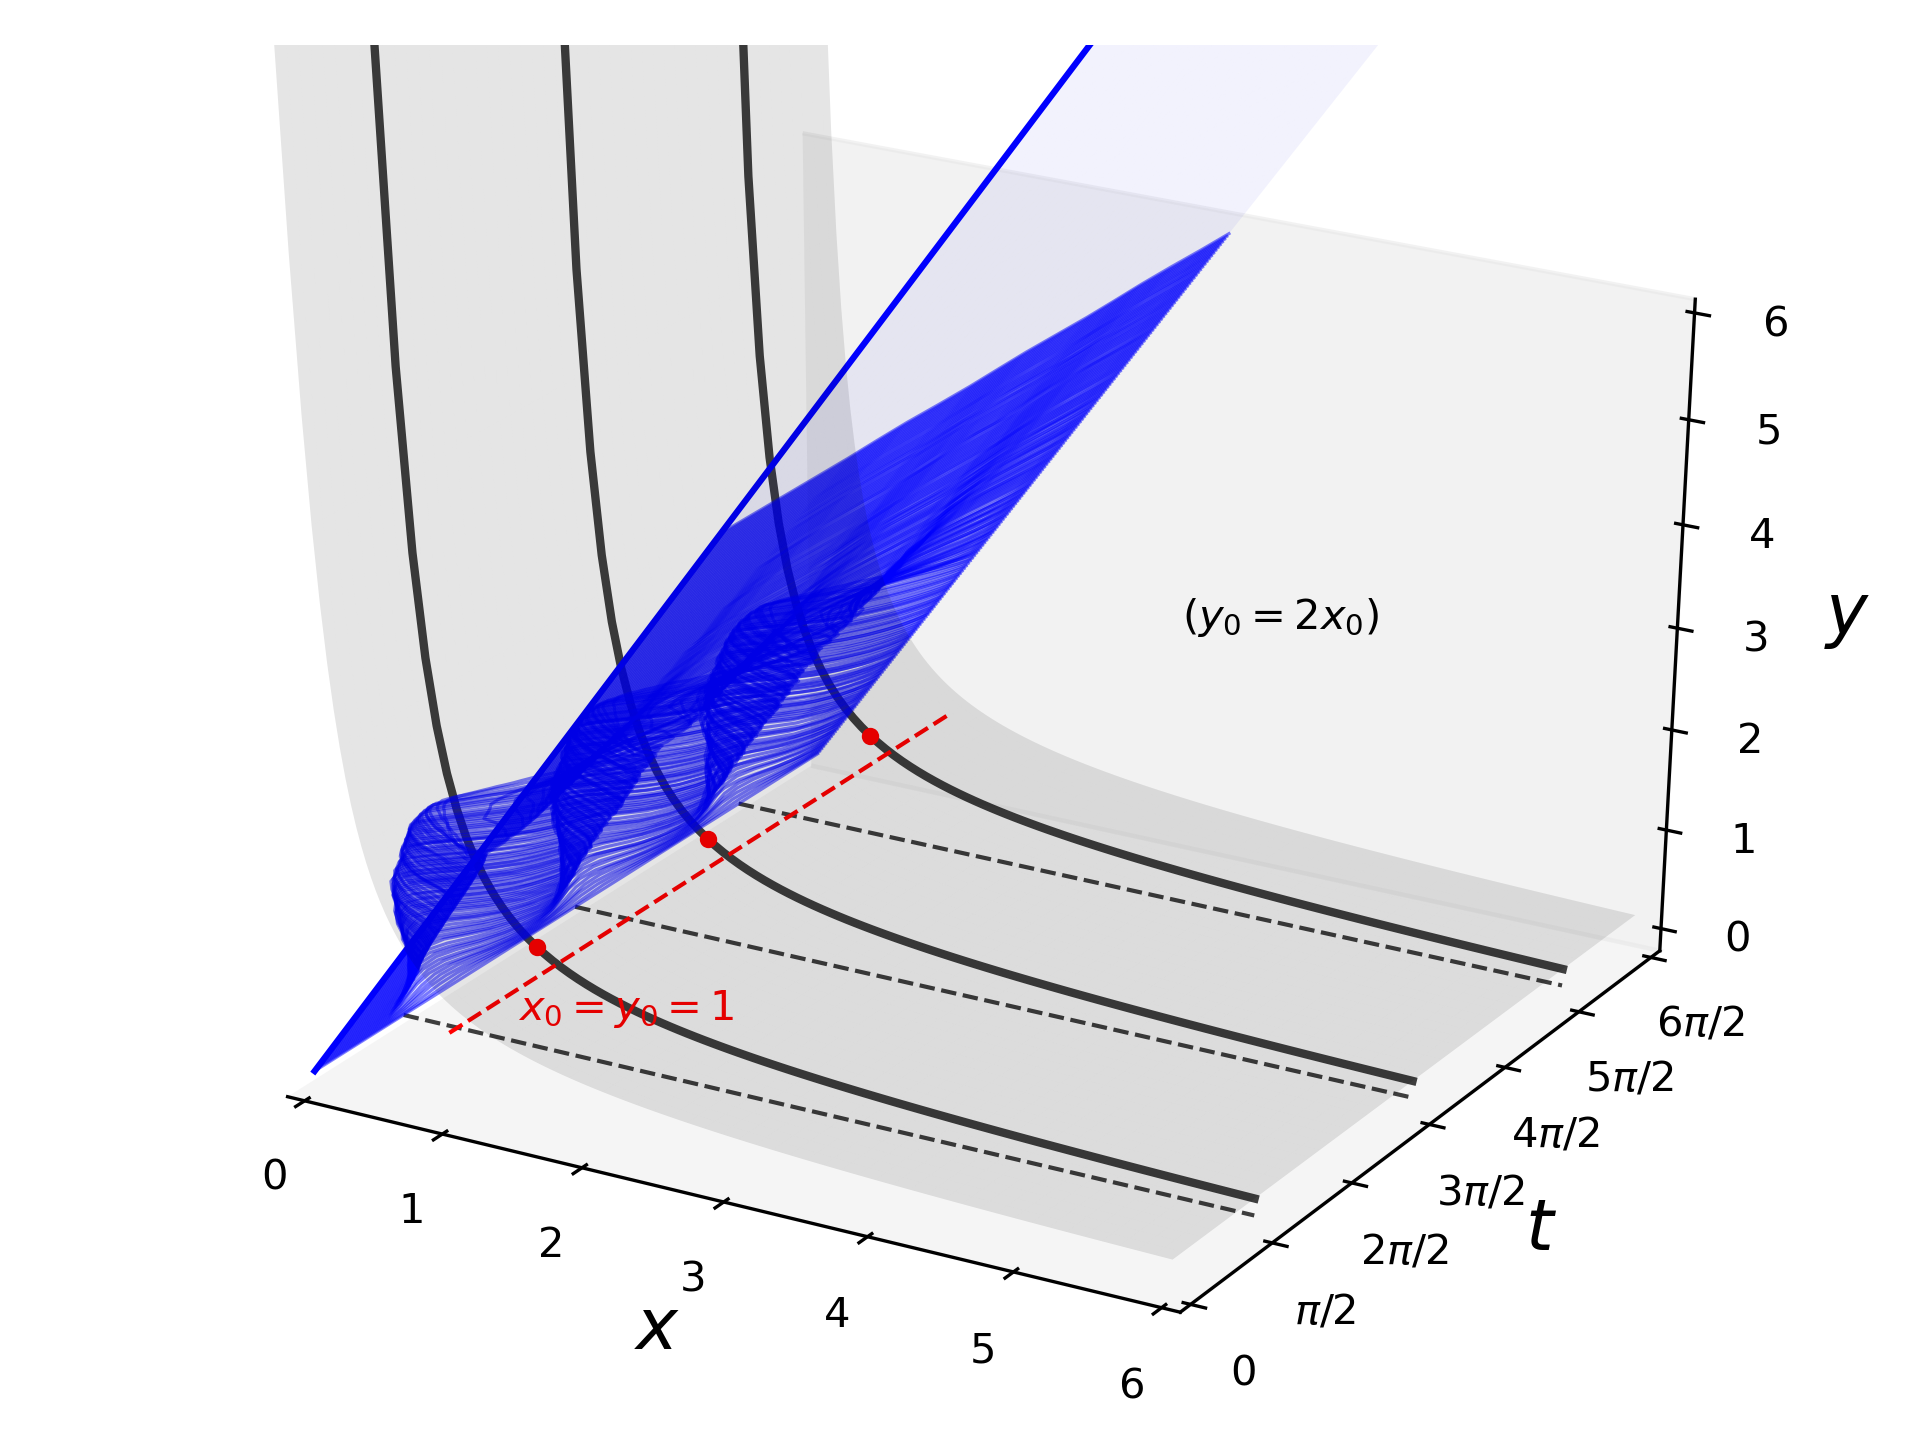

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

Periods = 5
##############################################
#
# PLOT NODAL LINES
#
##############################################
N_nodal = 100
for k in range(Periods+1):
    tN = k*np.ones(N_nodal)*np.pi/2
    if k%2==0:
        colorN = "green"
        alphaN = 0
    else: 
        colorN = "black"
        alphaN = 0.75
    #nodal lines coordinates: left branch
#     xN_left = np.linspace(-6, -0.1, N_nodal)
#     yN_left = (-1)**(k+1)/xN_left
#     ax.plot(xN_left, tN, yN_left, color=colorN,lw=2,linestyle="-",alpha=0.1)

    #nodal lines coordinates: right branch
    xN_right = np.linspace(0.1, 6, N_nodal)
    yN_right = (-1)**(k+1)/xN_right
    ax.plot(xN_right, tN, yN_right, color=colorN,lw=2,linestyle="-",alpha=alphaN)
    
    #bottom reference lines
#     x = np.linspace(-6,6,N_nodal)
    x = np.linspace(0,6,N_nodal)
    ax.plot(x, tN, 0*np.ones(N_nodal),color=colorN,lw=1,linestyle="--",alpha=alphaN)

# ax.plot(xN_left,((Periods+1)*np.pi/2)*np.ones(N_nodal),1/xN_left, color="black", lw=1, linestyle="--", alpha=0.2)
# ax.plot(xN_right,((Periods+1)*np.pi/2)*np.ones(N_nodal),1/xN_right, color="black", lw=1, linestyle="--", alpha=0.75)

# ax.plot(xN_left,((Periods+1)*np.pi/2)*np.ones(N_nodal),-1/xN_left, color="green", lw=1, linestyle="--", alpha=0.2)
# ax.plot(xN_right,((Periods+1)*np.pi/2)*np.ones(N_nodal),-1/xN_right, color="green", lw=1, linestyle="--", alpha=0.5)

# ax.plot(xN_right,(6*np.pi/2)*np.ones(N_nodal), -1*np.ones(N_nodal), color="green", lw=1, linestyle="--", alpha=0.5)
    
#plot plane
ts = np.linspace(0, 3*np.pi, 200)

# xs = np.linspace(-6, -0.1, 200)
# X, T = np.meshgrid(xs, ts)
# ax.plot_surface(X, T, -1/X ,color="black",alpha=0.1)

xs = np.linspace(6, 0.1, 200)
X, T = np.meshgrid(xs, ts)
ax.plot_surface(X, T, 1/X ,color="black",alpha=0.1)

# ax.plot_surface(X, T, -1/X,color="green",alpha=0.1)
##############################################
#
# PLOT TRAJECTORIES
#
##############################################
t0, tf = [0, 3*np.pi]
time_span = (t0, tf)
color_traj = 'blue'

# x_min, x_max = [-6, 6]
# y_min, y_max = [-6, 6]
# x = np.linspace(x_min, x_max, 10)
# y = np.linspace(y_min, y_max, 10)
# X,Y = np.meshgrid(x,y)
# ICs = np.column_stack([X.flatten(), Y.flatten()])

# for ic in ICs:
# #     ax.scatter(*ic, color=color_traj,s=3,alpha=0.5)
#     solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
#     trajectory = solution.y
#     n = len(trajectory[0])
#     ax.plot(trajectory[0], np.linspace(*time_span,n), trajectory[1], c=color_traj, lw=0.5, alpha=0.75)
    
#     ax.scatter(trajectory[0][-1], trajectory[1][-1], color="blue",s=3, alpha=1)

# ax.scatter([], [], color=color_traj,s=3, label="IC: ($x_0, y_0$)", alpha=1)

for h in np.linspace(0,6,200):
    ic = h*np.array([0.5,1])
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    line = ax.plot(trajectory[0], np.linspace(*time_span,n), trajectory[1], c=color_traj, lw=0.75, alpha=0.5)


#plot plane of ICs
ts = np.linspace(0, 3*np.pi, 200)
xs = np.linspace(0,6,200)
X, T = np.meshgrid(xs, ts)
ax.plot_surface(X, T, 2*X ,color="blue",alpha=0.05,zorder=20)

#plot plane of ICs
for k in range(3):
    ax.scatter(1,(2*k+1)*np.pi/2,1,color="red",s=10,zorder=40)

# line of ICs    
ax.plot(xs, np.zeros(len(xs)), 2*xs, color="blue")
ax.text(6, 0, 6, "($y_0 = 2x_0$)")
    
# intesection nodal lines with plane of ICs
ax.plot(np.ones(len(ts)),ts, (1/np.sqrt(2))*np.ones(len(ts)), color="red",linestyle="--",lw=1,alpha=1)
ax.text(1.5,0,1,"$x_0 = y_0 = 1$", color="red")
##############################################
ax.set_yticks(list((np.pi/2)*np.arange(7)))
ax.set_yticklabels([print_t_label(k, "$\pi/2$") for k in range(7)])

ax.set_xlabel("$x$", fontsize=17)
ax.set_ylabel("$t$", fontsize=17)
ax.set_zlabel("$y$", fontsize=17)

ax.set_xlim(0, 6)
ax.set_ylim(0, 3*np.pi)
ax.set_zlim(-0.1, 6)
ax.grid(False)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

fig.tight_layout()

plt.show()

PROJECTION

<IPython.core.display.Javascript object>


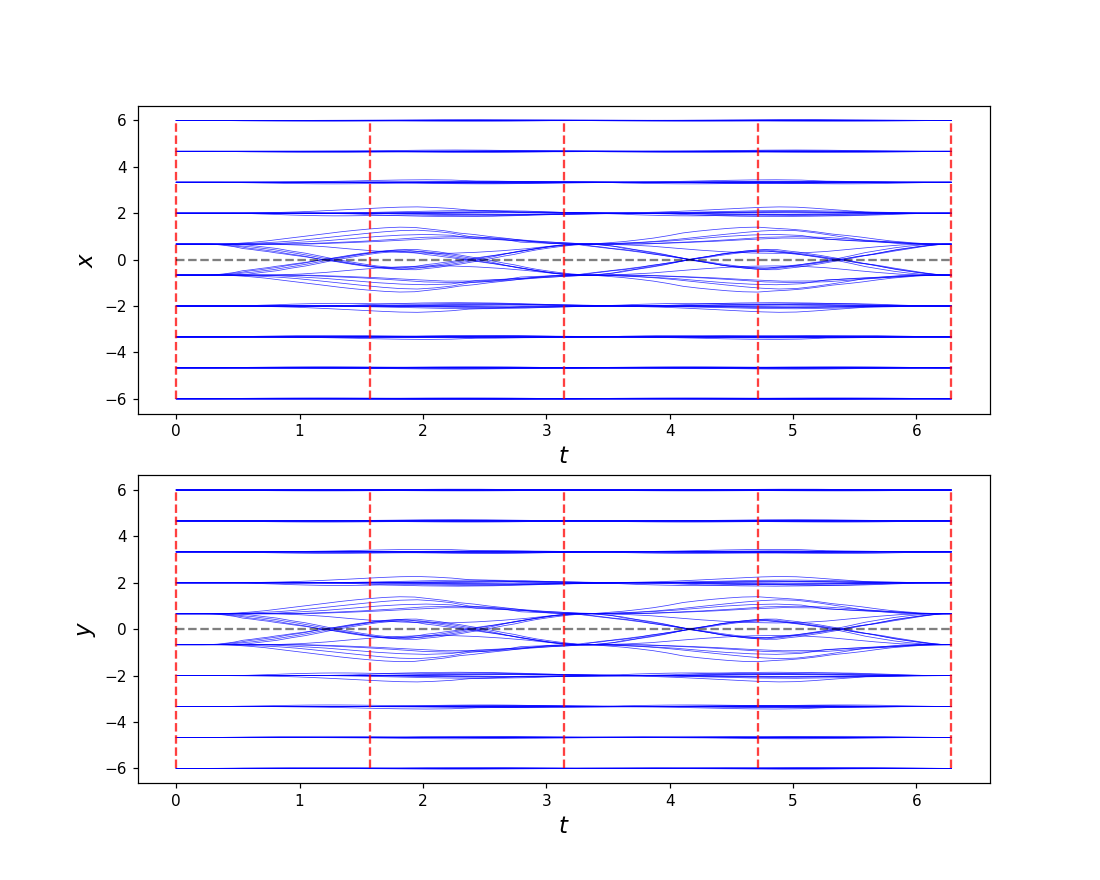

In [71]:
fig,ax = plt.subplots(2,1,figsize=(10,8),dpi=100)


##############################################
#CONTOUR PLOT
# n_levels = 200
# cmap = "rainbow"

# contour1 = ax.contourf(T,X,vx,levels=n_levels,cmap=cmap, alpha=0.95)
# cbar = fig.colorbar(contour1, extend='both', shrink=0.9, orientation="vertical", ax=ax)
# cbar.set_label("$dx/dt$", fontsize=15, rotation=90)

# # dashed lines
# xN_color = "yellow"
# ax.plot((0, 4*np.pi),(-1,-1), color=xN_color, label="$x(t) = -1$", linestyle="--", lw=1.5, alpha=0.5)
# ax.plot((0, 4*np.pi),(1,1), color=xN_color, label="$x(t) = +1$", linestyle="--", lw=1.5, alpha=0.5)

# ##############################################
# # plot nodal lines
# colorN = "red"
# for k in range(0, 5):
#     tk = k*np.pi
#     xN = -np.cos(tk)
#     ax.scatter(tk, xN, color=colorN,s=5,alpha=1,zorder=10)
#     #circles surrounding nodal lines
#     draw_circle = plt.Circle((tk, xN), 0.4, lw=1, color=colorN,fill=False, zorder=10)
#     ax.add_artist(draw_circle)

# ax.scatter([],[],color="red",s=10,label="($x_N, y_N$) = ($\pm 1, y_0$)")
##############################################
#vertical time lines
# for k in range(5):
#     ax.plot((k*np.pi, k*np.pi), (-6, 6), color="black", linestyle="--", lw=0.75, alpha=0.75)
#     ax.text(k*np.pi+0.1, -5.5, "t = "+str(k)+"$\pi$", rotation=90)
#     
##############################################
#
# PLOT TRAJECTORIES
#
##############################################

t0, tf = [0, 2*np.pi]
time_span = (t0, tf)
color_traj = 'blue'

x_min, x_max = [-6, 6]
y_min, y_max = [-6, 6]
x = np.linspace(x_min, x_max, 10)
y = np.linspace(y_min, y_max, 10)
X,Y = np.meshgrid(x,y)
ICs = np.column_stack([X.flatten(), Y.flatten()])

for ic in ICs:
#     ax.scatter(*ic, color=color_traj,s=3,alpha=0.5)
    solution = solve_ivp(vector_field, time_span, ic, rtol=1.0e-12)
    trajectory = solution.y
    n = len(trajectory[0])
    ax[0].plot(np.linspace(*time_span,n), trajectory[0], c=color_traj, lw=0.5, alpha=0.75)
    ax[1].plot(np.linspace(*time_span,n), trajectory[1], c=color_traj, lw=0.5, alpha=0.75)

for k in range(5):
    ax[0].plot((k*np.pi/2, k*np.pi/2),(-6,6), color="red", linestyle="--", alpha=0.75)
    ax[1].plot((k*np.pi/2, k*np.pi/2),(-6,6), color="red", linestyle="--", alpha=0.75)
    
    
ax[0].plot(time_span,(0,0), color="black", linestyle="--", alpha=0.5)
ax[1].plot(time_span,(0,0), color="black", linestyle="--", alpha=0.5)


    
# t0, tf = [0, 4*np.pi]
# time_span = (t0, tf)
# color_traj = 'black'

# N_traj = 200

# ICs_interval = [1.25, 2.75]
# # ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

# for x in np.linspace(*ICs_interval, N_traj):
#     IC = np.array([x, 0])
#     solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
#     trajectory = solution.y
#     ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)

# # ICs_interval = [-0.75, 0.75]
# # ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

# for x in np.linspace(*ICs_interval, N_traj):
#     IC = np.array([x, 0])
#     solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
#     trajectory = solution.y
#     ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
    
# ICs_interval = [-2.75, -1.25]
# # ax.plot((0, 0), ICs_interval, color="yellow",lw=2,zorder=30)

# for x in np.linspace(*ICs_interval, N_traj):
#     IC = np.array([x, 0])
#     solution = solve_ivp(vector_field, time_span, IC, rtol=1.0e-12)
#     trajectory = solution.y
#     ax.plot(np.linspace(*time_span,len(trajectory[0])), trajectory[0], c=color_traj, lw=0.25, alpha=0.25)
    
##############################################
#
# CUSTOMISE APPEARANCE
#
##############################################
#title
# title = 'Bohmian vector field: $a=1, b=0, \omega_2=1$'
# fig.suptitle(title, fontsize=20)

#axis labels
ax[0].set_xlabel("$t$", fontsize=15)
ax[0].set_ylabel("$x$", fontsize=15)

ax[1].set_xlabel("$t$", fontsize=15)
ax[1].set_ylabel("$y$", fontsize=15)

# #legends
# ax.legend(loc="best")
##############################################

# ax.set_aspect(1)
plt.show()

### Poincare Maps

In [161]:
N = 100

x_min, x_max = [-6, 6]
y_min, y_max = [-6, 6]
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
X,Y = np.meshgrid(x,y)
ICs = np.column_stack([X.flatten(), Y.flatten()])

# ICs = 12*(np.random.rand(N**2,2) - 0.5)

color_traj = 'blue'

data_points = []
for k in range(10):
    t0, tf = [k*np.pi/2, (k+1)*np.pi/2]
    time_span = (t0, tf)
    
    for ic in ICs:
        solution = solve_ivp(vector_field, time_span, ic, t_eval=[tf], rtol=1.0e-12)
        trajectory = solution.y
        data_points.append(trajectory)


<IPython.core.display.Javascript object>


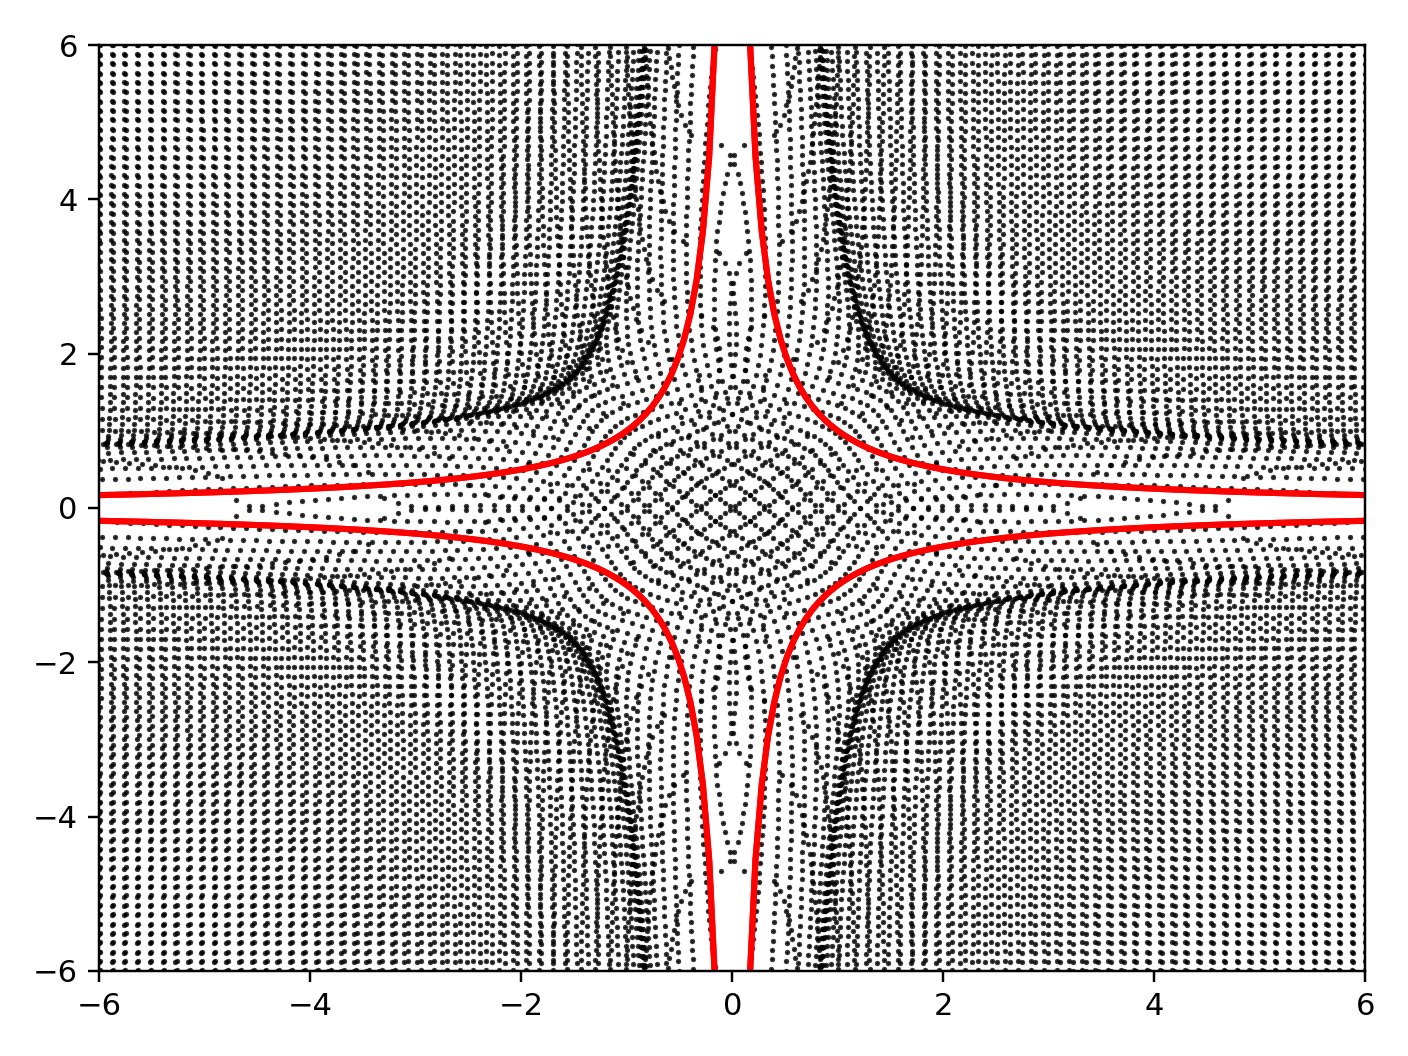

In [162]:
fig,ax = plt.subplots(1,1,dpi=200)

##############################################
#
# PLOT NODAL LINES
#
##############################################
for k in range(4):
    N_nodal = 100
    #left branch
    xN_left = np.linspace(-6, -0.1, N_nodal)
    yN = (-1)**(k+1)/xN_left
    ax.plot(xN_left, yN, color="red",lw=2,linestyle="-",alpha=1)

    #right branch
    x_right = np.linspace(0.1, 6, N_nodal)
    y = (-1)**(k+1)/x_right
    ax.plot(x_right, y, color="red",lw=2,linestyle="-",alpha=1)

##############################################
data_points = np.array(data_points)
ax.scatter(*data_points.T[0],color="black",marker="o",s=0.5,alpha=0.25)

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

fig.tight_layout()

plt.show()